<a href="https://colab.research.google.com/github/KorayKinik/heat-extremes-CMIP6/blob/main/CSCI_E82_Fall_2021_Section3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='top'></a>

------

CSCI E-82 Advanced Machine Learning, Data Mining and Artificial Intelligence
=====

# Section 3:  18 September 2021, 12:00 PM EDT

----------
Notebook from: *Shivas Jayaram*

Welcome to CSCI E-82
------

Topics for this section
==================
- Intro to Colab
- Deep Learning Frameworks
- Introduction to TensorFlow 2
- Deep Learning Fundamentals
- Activation Functions
- Optimizers
- Loss Functions
- Weight Initialization
- Data for Deep Learning
- Fully Connected Networks
- Convolutions Neural Networks
- AutoEncoders

------

## Setting up Colab with GPU

[Here is just one of the many references explaining Colab.](https://towardsdatascience.com/getting-started-with-google-colab-f2fff97f594c) Let's demo.

## Start a notebook.

1) Go to https://colab.research.google.com/  
2) Click create New notebook  
3) By default Tensorflow version will be the latest  
4) If for some reason you want TF 1.x, run this command in your notebook  
```
%tensorflow_version 1.x
```

5) To check the avaiable devices (CPU, GPU, TPU) run this:  
```
devices = tf.config.experimental.get_visible_devices()
print("Devices:",devices)
print(tf.config.experimental.list_logical_devices('GPU'))
```
The result will be something like this:  
```
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[]
```

6) Set the runtime to use GPU by going to "Runtime" menu and select "Change runtime type". Then in the popup in "Hardware accelerator" select "GPU" and then click "Save"

7) If you want high RAM there is an option for that

8) You will need to re-run your notebook and the results from your cell for printing devices should look something like this:

```
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] 
[LogicalDevice(name='/job:localhost/replica:0/task:0/device:GPU:0', device_type='GPU')]
```

## Importing (any) data

Way 1) Mount your Google Drive. Please use this for the homework.

```
from google.colab import drive
drive.mount('/content/drive')
```

Way 2) You can also download directly from an url (same as `wget`). This is good way if you want to share public files/datasets with friends - so they don't have to download the data and mount. Because they cannot mount their Colab to your Google Drive.

```
!gdown --id 1Pp6IbhSmmSY8VaKtza16e6m_fH8tytQ8
```
The ``--id`` is the id when you "share" a file in your Google Drive. It works (reliably) only when the url is "Anyone can see", i.e. public access.

If you want to publish and download a **folder**, you can zip the folder, and it becomes a "file"! So simply, do:

```
!gdown --id 1Pp6IbhSmmSY8VaKtza16e6m_fH8tytQ8
!unzip "/content/train.zip"
```
See 
```
!gdown --help
```
for the cli args (e.g. how to rename the file, choose a different location to download to, etc.

---

To install a package not available in colab:  
```%pip install scipy```

## Deep Learning Frameworks

There are a number of deep learning frameworks. [Here](https://opendatascience.com/deep-learning-frameworks-you-need-to-know-in-2020/) is a list of the popular ones for 2020. Some of the one from the list are:

- [TensorFlow](https://www.tensorflow.org/) (`tf.keras` is an abtraction on top of TF) - Google
- [PyTorch](https://pytorch.org/) - Facebook
- [MS Cognitive Toolkit](https://docs.microsoft.com/en-us/cognitive-toolkit/) - Microsoft 
- [Apache MXNet](https://mxnet.apache.org/) - Apache

In this class we will be primarly focusing on TensorFlow 2. 

## Introduction to TensorFlow 2

TensorFlow 2.0 official release was in Septempter 2019 and current stable version is 2.3. Keras is a default package within TensorFlow 2

Some quick resources to get you up and running:
- [TensorFlow Guide](https://www.tensorflow.org/guide)
- [Keras examples](https://keras.io/examples/)
- [TF Hub](https://www.tensorflow.org/hub/overview)

#### Imports

In [ ]:
import os
import requests
import zipfile
import numpy as np
import pandas as pd
import cv2
import time
import json
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import initializers

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from graphviz import Digraph
from IPython.core.display import HTML

#### Verify Setup

References:
- [Eager Execution](https://www.tensorflow.org/guide/eager)
- [Data Performance](https://www.tensorflow.org/guide/data_performance)

In [ ]:
# Enable/Disable Eager Execution
# Reference: https://www.tensorflow.org/guide/eager
# TensorFlow's eager execution is an imperative programming environment that evaluates operations immediately, 
# without building graphs

#tf.compat.v1.disable_eager_execution()
#tf.compat.v1.enable_eager_execution()

print("tensorflow version", tf.__version__)
print("keras version", tf.keras.__version__)
print("Eager Execution Enabled:", tf.executing_eagerly())

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("TPU Device:", tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.MirroredStrategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

devices = tf.config.experimental.get_visible_devices()
print("Devices:", devices)
print(tf.config.experimental.list_logical_devices('GPU'))

print("GPU Available: ", tf.config.list_physical_devices('GPU'))
print("All Pysical Devices", tf.config.list_physical_devices())

# Better performance with the tf.data API
# Reference: https://www.tensorflow.org/guide/data_performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

tensorflow version 2.3.0
keras version 2.4.0
Eager Execution Enabled: True
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of replicas: 1
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
All Pysical Devices [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Utils

In [ ]:
def download_file(packet_url, base_path="", extract=False):
  if base_path != "":
    if not os.path.exists(base_path):
      os.mkdir(base_path)
  packet_file = os.path.basename(packet_url)
  with requests.get(packet_url, stream=True) as r:
      r.raise_for_status()
      with open(os.path.join(base_path,packet_file), 'wb') as f:
          for chunk in r.iter_content(chunk_size=8192):
              f.write(chunk)
  
  if extract:
    with zipfile.ZipFile(os.path.join(base_path,packet_file)) as zfile:
        zfile.extractall(base_path)

### Tensor Operations

In [ ]:
m1 = [[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]]
m2 = [[7.0, 8.0, 9.0], [13.0, 14.0, 15.0], [15.0, 16.0, 17.0]]

t1 = tf.convert_to_tensor(m1, dtype=tf.float32)
t2 = tf.convert_to_tensor(m2, dtype=tf.float32)

print(type(t1), t1)
print(t1.numpy())
print(type(t2), t2)
print(t2.numpy())

t3 = tf.concat([t1, t2], 1)
print(type(t3), t3)
print(t3.numpy())

t4 = tf.expand_dims(t1, -1)
print(type(t4), t4)
print(t4.numpy())

<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float32)
[[1. 2.]
 [3. 4.]
 [5. 6.]]
<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(
[[ 7.  8.  9.]
 [13. 14. 15.]
 [15. 16. 17.]], shape=(3, 3), dtype=float32)
[[ 7.  8.  9.]
 [13. 14. 15.]
 [15. 16. 17.]]
<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(
[[ 1.  2.  7.  8.  9.]
 [ 3.  4. 13. 14. 15.]
 [ 5.  6. 15. 16. 17.]], shape=(3, 5), dtype=float32)
[[ 1.  2.  7.  8.  9.]
 [ 3.  4. 13. 14. 15.]
 [ 5.  6. 15. 16. 17.]]
<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(
[[[1.]
  [2.]]

 [[3.]
  [4.]]

 [[5.]
  [6.]]], shape=(3, 2, 1), dtype=float32)
[[[1.]
  [2.]]

 [[3.]
  [4.]]

 [[5.]
  [6.]]]


In [ ]:
input_shape = (1, 28, 28, 3)
image = tf.random.normal(input_shape)
print(image.shape)
image = image/255
print(image.shape)

(1, 28, 28, 3)
(1, 28, 28, 3)


In [ ]:
input_shape = (1, 28, 28, 3)
image = tf.random.normal(input_shape)
print(image.shape)
image = tf.reshape(image, [28 * 28 * 3])
print(image.shape)

(1, 28, 28, 3)
(2352,)


## Deep Learning Fundamentals

### Simple Linear Classifier

$$
f(x_i, W, b) =  W x_i + b
$$

[Linear Classification Reference](https://cs231n.github.io/linear-classify/)

### Perceptron

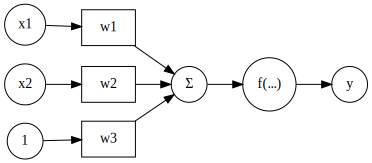

In [ ]:
# Reference:
# https://graphviz.readthedocs.io/en/stable/examples.html

# Create Digraph
dot = Digraph()
dot.attr(rankdir='LR')

dot.node("x1",shape="circle")
dot.node("x2",shape="circle")
dot.node("1",shape="circle")

dot.node("w1",shape="box")
dot.node("w2",shape="box")
dot.node("w3",shape="box")

dot.node("sum",shape="circle", label="Σ")
dot.node("step",shape="circle", label="f(...)")
dot.node("out",shape="circle", label="y")

dot.edge("x1","w1")
dot.edge("x2","w2")
dot.edge("1","w3")

dot.edge("w1","sum")
dot.edge("w2","sum")
dot.edge("w3","sum")

dot.edge("sum","step")
dot.edge("step","out")

# Draw graph
dot

### Perceptron OR

In [ ]:
def step_function(predictions):
  # Simple step function
  if predictions > 0.0:
      return 1.0
  else:
      return 0.0

def train_simple_linear_classifier(inputs, outputs, lr, epochs, operation="OR"):
  # Random weights
  weights = np.random.randn(2 + 1) / np.sqrt(2)

  inputs_with_bias = np.c_[inputs,np.ones(inputs.shape[0])]
  print("Inputs with bias:\n", inputs_with_bias)

  for epoch in np.arange(0, epochs):
      
    for idx,ip in enumerate(inputs_with_bias):
      # Compute the dot product of input with weights
      predictions = np.dot(ip, weights)
      # Apply Step function
      prediction_out = step_function(predictions)
      
      if prediction_out != outputs[idx][0]:
        error = prediction_out - outputs[idx][0]
        # Update weights
        weights = weights - (lr * error * ip)
    
    if (epoch == 0) or (epoch >= 5 and epoch%5 == 0):
      print("Epoch:", epoch)
      print("weights:\n",weights)

      for idx,ip in enumerate(inputs_with_bias):
        predictions = np.dot(ip, weights)
        # Step function
        prediction_out = step_function(predictions)

        print(ip[0],operation,ip[1], "=",outputs[idx][0],", Prediction:", prediction_out,", Prediction value:", round(predictions,4))

In [ ]:
# OR dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype="float32")
outputs = np.array([[0], [1], [1], [1]], dtype="float32")

lr = 0.1
epochs = 21

train_simple_linear_classifier(inputs, outputs, lr, epochs, operation="OR")

Inputs with bias:
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Epoch: 0
weights:
 [-0.33167443  0.11420089  0.31456822]
0.0 OR 0.0 = 0.0 , Prediction: 1.0 , Prediction value: 0.3146
0.0 OR 1.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.4288
1.0 OR 0.0 = 1.0 , Prediction: 0.0 , Prediction value: -0.0171
1.0 OR 1.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.0971
Epoch: 5
weights:
 [-0.03167443  0.11420089  0.11456822]
0.0 OR 0.0 = 0.0 , Prediction: 1.0 , Prediction value: 0.1146
0.0 OR 1.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.2288
1.0 OR 0.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.0829
1.0 OR 1.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.1971
Epoch: 10
weights:
 [ 0.16832557  0.11420089 -0.08543178]
0.0 OR 0.0 = 0.0 , Prediction: 0.0 , Prediction value: -0.0854
0.0 OR 1.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.0288
1.0 OR 0.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.0829
1.0 OR 1.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.1971
Epoch: 15
weig

### Perceptron AND

In [ ]:
# AND dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype="float32")
outputs = np.array([[0], [0], [0], [1]], dtype="float32")

lr = 0.1
epochs = 21

train_simple_linear_classifier(inputs, outputs, lr, epochs, operation="AND")

Inputs with bias:
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Epoch: 0
weights:
 [-0.15013602  0.19134721  0.35550611]
0.0 AND 0.0 = 0.0 , Prediction: 1.0 , Prediction value: 0.3555
0.0 AND 1.0 = 0.0 , Prediction: 1.0 , Prediction value: 0.5469
1.0 AND 0.0 = 0.0 , Prediction: 1.0 , Prediction value: 0.2054
1.0 AND 1.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.3967
Epoch: 5
weights:
 [ 0.14986398  0.19134721 -0.14449389]
0.0 AND 0.0 = 0.0 , Prediction: 0.0 , Prediction value: -0.1445
0.0 AND 1.0 = 0.0 , Prediction: 1.0 , Prediction value: 0.0469
1.0 AND 0.0 = 0.0 , Prediction: 1.0 , Prediction value: 0.0054
1.0 AND 1.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.1967
Epoch: 10
weights:
 [ 0.24986398  0.19134721 -0.34449389]
0.0 AND 0.0 = 0.0 , Prediction: 0.0 , Prediction value: -0.3445
0.0 AND 1.0 = 0.0 , Prediction: 0.0 , Prediction value: -0.1531
1.0 AND 0.0 = 0.0 , Prediction: 0.0 , Prediction value: -0.0946
1.0 AND 1.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.0967


### Perceptron XOR

In [ ]:
# XOR dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype="float32")
outputs = np.array([[0], [1], [1], [0]], dtype="float32")

lr = 0.1
epochs = 21
# Train a simple linear classifier for XOR dataset
train_simple_linear_classifier(inputs, outputs, lr, epochs, operation="XOR")

Inputs with bias:
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Epoch: 0
weights:
 [-1.07656573  0.43330878  0.55814989]
0.0 XOR 0.0 = 0.0 , Prediction: 1.0 , Prediction value: 0.5581
0.0 XOR 1.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.9915
1.0 XOR 0.0 = 1.0 , Prediction: 0.0 , Prediction value: -0.5184
1.0 XOR 1.0 = 0.0 , Prediction: 0.0 , Prediction value: -0.0851
Epoch: 5
weights:
 [-0.77656573  0.23330878  0.35814989]
0.0 XOR 0.0 = 0.0 , Prediction: 1.0 , Prediction value: 0.3581
0.0 XOR 1.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.5915
1.0 XOR 0.0 = 1.0 , Prediction: 0.0 , Prediction value: -0.4184
1.0 XOR 1.0 = 0.0 , Prediction: 0.0 , Prediction value: -0.1851
Epoch: 10
weights:
 [-0.47656573  0.03330878  0.15814989]
0.0 XOR 0.0 = 0.0 , Prediction: 1.0 , Prediction value: 0.1581
0.0 XOR 1.0 = 1.0 , Prediction: 1.0 , Prediction value: 0.1915
1.0 XOR 0.0 = 1.0 , Prediction: 0.0 , Prediction value: -0.3184
1.0 XOR 1.0 = 0.0 , Prediction: 0.0 , Prediction value: -0.285

### Solving the XOR problem with Neural Networks

In [ ]:
# XOR dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype="float32")
outputs = np.array([[0], [1], [1], [0]], dtype="float32")

# Build a simple model using tf.keras
model = Sequential()
# Input
model.add(layers.Input(shape=2))
# Hidden Layer
model.add(layers.Dense(units=4, activation="tanh")) # Adding the non linear activation function is what helps solve the XOR problem
# Output Layer
model.add(layers.Dense(units=1, activation="sigmoid"))

optimizer = optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer)

model.fit(inputs, outputs, batch_size=1, epochs=500, verbose=0)
print(model.predict(inputs))

[[0.00368547]
 [0.98250085]
 [0.9801241 ]
 [0.02662047]]


## Activation Functions

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

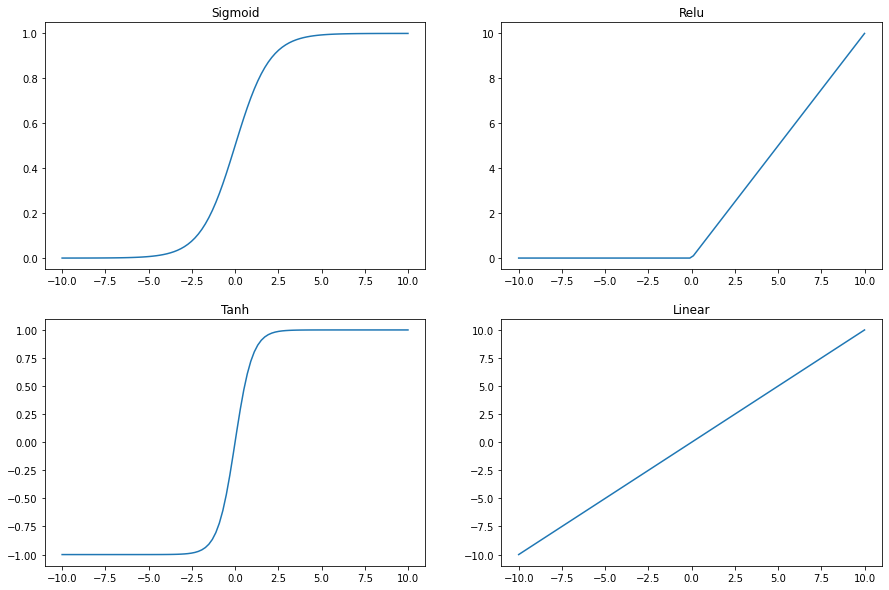

In [ ]:
# Make up some data
points = 100
input = np.linspace(-10,10,points)
input_tensor = tf.constant(input, dtype = tf.float32)

# Display the activations
fig = plt.figure(figsize=(15,10))

# Sigmoid
sigmoid = keras.activations.sigmoid(input_tensor).numpy()
axs = fig.add_subplot(2, 2, 1)
axs.plot(input, sigmoid)
axs.set_title('Sigmoid')

# Relu
relu = keras.activations.relu(input_tensor).numpy()
axs = fig.add_subplot(2, 2, 2)
axs.plot(input, relu)
axs.set_title('Relu')

# Tanh
tanh = keras.activations.tanh(input_tensor).numpy()
axs = fig.add_subplot(2, 2, 3)
axs.plot(input, tanh)
axs.set_title('Tanh')

# Linear
linear = keras.activations.linear(input_tensor).numpy()
axs = fig.add_subplot(2, 2, 4)
axs.plot(input, linear)
axs.set_title('Linear')

plt.show()

## Optimizers

[Reference](https://keras.io/api/optimizers/)

In [ ]:
# Build a Simple Model
def build_model():
    # Input
    model_input = layers.Input(shape=2)
    # Hidden Layers
    hidden = layers.Dense(units=2, activation="relu")(model_input)
    # Output Layer
    output = layers.Dense(units=1, activation='sigmoid')(hidden)
    # Create model
    model = Model(model_input, output, name='simple_model_optimizer_loss')
    
    return model

model = build_model()
print(model.summary())

Model: "simple_model_optimizer_loss"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


Let us look at the model intialized weights

In [ ]:
weights = model.get_weights()

print("Layer weights Initial")
print("------------------------------------")
print("Layer 0:\n",weights[0],weights[1])
print("Layer 1:\n",weights[2],weights[3])

Layer weights Initial
------------------------------------
Layer 0:
 [[-0.04806328 -0.30858475]
 [ 0.06313872 -0.65140116]] [0. 0.]
Layer 1:
 [[-1.3087456 ]
 [-0.09010899]] [0.]


In [ ]:
# Check the default weight initializers
model.to_json()

'{"class_name": "Functional", "config": {"name": "simple_model_optimizer_loss", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 2], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_2"}, "name": "input_2", "inbound_nodes": []}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "dtype": "float32", "units": 2, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "dense_2", "inbound_nodes": [[["input_2", 0, 0, {}]]]}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "dtype": "float32", "units": 1, "activation": "sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_i

Compute output using the model

In [ ]:
# Compute output using the model
inputs = np.array([[1, 1]], dtype="float32")

# Find output
ouput = model(inputs)
print("Output:",ouput.numpy()[0])

Output: [0.4950677]


Manually compute the output

In [ ]:
# Get the weights for all the layers
weights = model.get_weights()
weights_1 = weights[0]
bias_1 = weights[1]
weights_2 = weights[2]
bias_2 = weights[3]

# Activation for first hidden layer
relu = layers.Activation('relu')
# Activation for final layer
sigmoid = layers.Activation('sigmoid')

# Compute the intermediate layer output
output = inputs.dot(weights_1)+bias_1
output = relu(output).numpy()
print("Intermeditat Output",output[0])

# Compute final layer output
output = output.dot(weights_2)+bias_2
output = sigmoid(output).numpy()
print("Output:",output[0])

Intermeditat Output [0.01507545 0.        ]
Output: [0.4950677]


**Train model manually**

In [ ]:
# data
inputs = np.array([[1, 1]], dtype="float32")
outputs = np.array([[0]], dtype="float32")
print("inputs:",inputs,"outputs",outputs)

# Build Model
model = build_model()

# Optimizer
optimizer = optimizers.SGD(lr=0.1)
# Loss function
loss_function  = losses.binary_crossentropy

def train(model, inputs, outputs, optimizer,loss_function, epochs=1, debug=True):
  
  # Get models weights before training
  before_weights = model.get_weights()
  loss_history = []
  
  for idx in range(epochs):

    # Open a GradientTape
    with tf.GradientTape() as tape:
      ################
      ### Forward Pass
      ################
      # 1: Pass inputs through model
      predictions = model(inputs)
      
      # 2: Compute the loss
      loss_value = loss_function(outputs, predictions)
      loss_history.append(loss_value.numpy()[0])
      
      #################
      ### Backward Pass
      #################
      # 1: Compute the gradients of loss wrt the weights
      gradients = tape.gradient(loss_value, model.trainable_weights)

      # 2: Update the weights of the model
      optimizer.apply_gradients(zip(gradients, model.trainable_weights))
  
  if debug:
    print("Prediction:", predictions.numpy())
    print("Loss Value:", loss_value.numpy())

    print("Layer weights before gradient update")
    print("------------------------------------")
    print("Layer 0:\n",before_weights[0],before_weights[1])
    print("Layer 1:\n",before_weights[2],before_weights[3])

    # Weights after gradient update
    after_weights = model.get_weights()
    print("Layer weights after gradient update")
    print("------------------------------------")
    print("Layer 0:\n",after_weights[0],after_weights[1])
    print("Layer 1:\n",after_weights[2],after_weights[3])
  
  return loss_history

# Train for 1 epoch
loss_history = train(model,inputs, outputs,optimizer,loss_function,epochs=1)

inputs: [[1. 1.]] outputs [[0.]]
Prediction: [[0.6228556]]
Loss Value: [0.9751269]
Layer weights before gradient update
------------------------------------
Layer 0:
 [[-0.34286135  1.03768   ]
 [ 0.8482846   1.1518677 ]] [0. 0.]
Layer 1:
 [[0.60194695]
 [0.09017777]] [0.]
Layer weights after gradient update
------------------------------------
Layer 0:
 [[-0.38035396  1.0320632 ]
 [ 0.810792    1.146251  ]] [-0.0374926  -0.00561677]
Layer 1:
 [[ 0.5704664 ]
 [-0.04619941]] [-0.06228555]


In [ ]:
# Train for 1 more epoch
loss_history = train(model,inputs, outputs,optimizer,loss_function,epochs=1)

Prediction: [[0.51536995]]
Loss Value: [0.7243693]
Layer weights before gradient update
------------------------------------
Layer 0:
 [[-0.38035396  1.0320632 ]
 [ 0.810792    1.146251  ]] [-0.0374926  -0.00561677]
Layer 1:
 [[ 0.5704664 ]
 [-0.04619941]] [-0.06228555]
Layer weights after gradient update
------------------------------------
Layer 0:
 [[-0.40975407  1.0344442 ]
 [ 0.7813919   1.1486319 ]] [-0.06689272 -0.00323579]
Layer 1:
 [[ 0.5502152]
 [-0.1581737]] [-0.11382254]


In [ ]:
# Train for 1 more epoch
loss_history = train(model,inputs, outputs,optimizer,loss_function,epochs=1)

Prediction: [[0.42777362]]
Loss Value: [0.5582203]
Layer weights before gradient update
------------------------------------
Layer 0:
 [[-0.40975407  1.0344442 ]
 [ 0.7813919   1.1486319 ]] [-0.06689272 -0.00323579]
Layer 1:
 [[ 0.5502152]
 [-0.1581737]] [-0.11382254]
Layer weights after gradient update
------------------------------------
Layer 0:
 [[-0.4332908  1.0412104]
 [ 0.7578552  1.1553981]] [-0.09042947  0.00353046]
Layer 1:
 [[ 0.537179  ]
 [-0.25142148]] [-0.1565999]


Now let us see the entire training with multiple learning rates

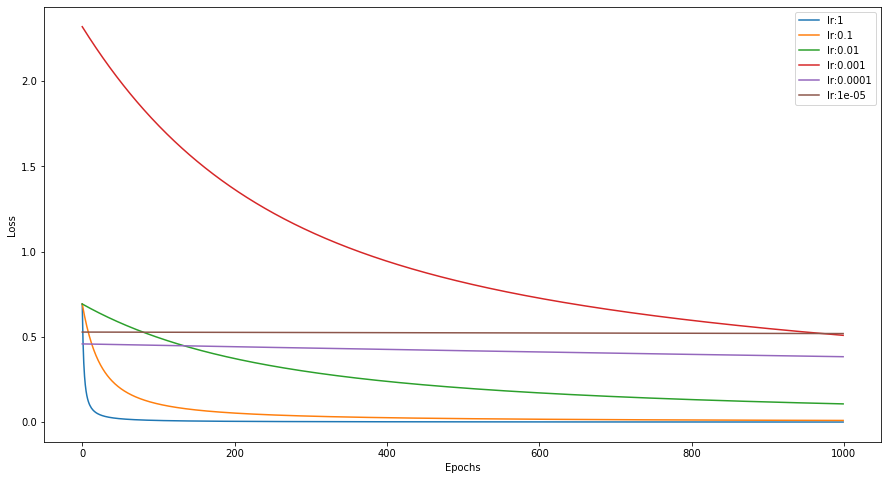

In [ ]:
# Loss function
loss_function  = losses.binary_crossentropy
epochs = 1000

learning_rates = [1,0.1,0.01,0.001,0.0001,0.00001]

fig = plt.figure(figsize=(15,8))
axs = fig.add_subplot(1,1,1)
for idx, lr in enumerate(learning_rates):
  # Build Model
  model = build_model()
  # Optimizer
  optimizer = optimizers.SGD(lr=lr)
  # Train model
  loss_history = train(model,inputs, outputs,optimizer,loss_function,epochs=epochs,debug=False)
  
  axs.plot(list(range(0, epochs)), loss_history, label='lr:'+str(lr))

axs.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Reference:
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
# learning_rate: float hyperparameter >= 0. Learning rate.
# momentum: float hyperparameter >= 0 that accelerates SGD in the relevant direction and dampens oscillations.
# nesterov: boolean. Whether to apply Nesterov momentum.

optimizer_list = [
    optimizers.SGD(learning_rate=0.1,momentum=0.01,nesterov=True)
]

# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop
# learning_rate: A Tensor or a floating point value. The learning rate.
# rho: Discounting factor for the history/coming gradient
# momentum: A scalar tensor.
# epsilon: Small value to avoid zero denominator.
# centered: If True, gradients are normalized by the estimated variance of the gradient; if False, 
# by the uncentered second moment. Setting this to True may help with training, but is slightly more 
#expensive in terms of computation and memory. Defaults to False.

optimizer_list.append(optimizers.RMSprop(learning_rate=0.1,rho=0.9,momentum=0.01,epsilon=1e-07))

# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
# learning_rate: A Tensor or a floating point value. The learning rate.
# beta_1: A float value or a constant float tensor. The exponential decay rate for the 1st moment estimates.
# beta_2: A float value or a constant float tensor. The exponential decay rate for the 2nd moment estimates.
# epsilon: A small constant for numerical stability. This epsilon is "epsilon hat" in the Kingma and Ba paper 
# (in the formula just before Section 2.1), not the epsilon in Algorithm 1 of the paper.
# amsgrad: boolean. Whether to apply AMSGrad variant of this algorithm from the paper "On the Convergence of Adam and beyond".

optimizer_list.append(optimizers.Adam(learning_rate=0.1,beta_1=0.9,beta_2=0.999,epsilon=1e-07))


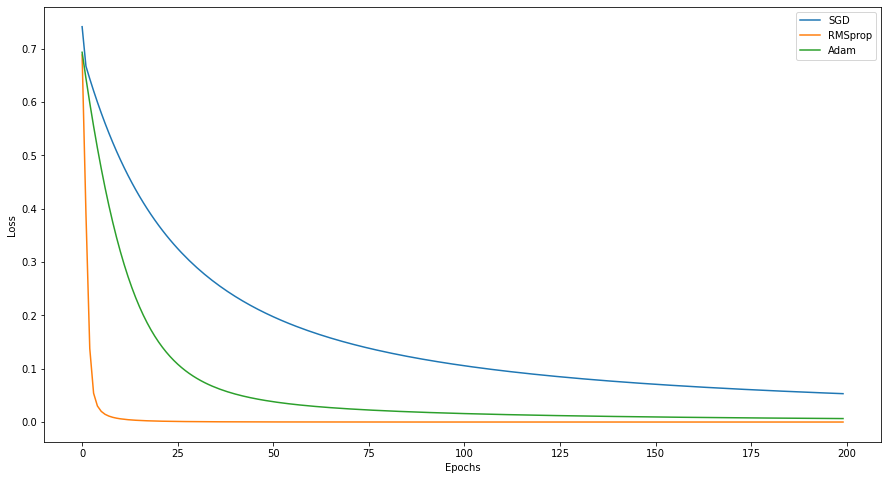

In [ ]:
# Loss function
loss_function  = losses.binary_crossentropy
epochs = 200

fig = plt.figure(figsize=(15,8))
axs = fig.add_subplot(1,1,1)
for idx, opt in enumerate(optimizer_list):
    # Build Model
    model = build_model()
    # Optimizer
    optimizer = opt
    # Train model
    loss_history = train(model,inputs, outputs,opt,loss_function,epochs=epochs,debug=False)

    axs.plot(list(range(0, epochs)), loss_history, label=type(optimizer).__name__)

axs.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Loss Functions


[Reference](https://keras.io/api/losses/)

**Probabilistic losses**
- Binary Crossentropy
- Categorical Crossentropy
- Sparse Categorical Crossentropy
- Poisson
- KLDivergence

**Regression losses**
- MeanSquaredError
- MeanAbsoluteError
- MeanAbsolutePercentageError
- MeanSquaredLogarithmicError
- CosineSimilarity
- Huber
- LogCosh
- Hinge
- SquaredHinge
- Categorical Hinge

Let us go over the main losses we will be using for Image Classification problems

#### Binary Crossentropy

Computes the cross-entropy loss between true labels and predicted labels. Cross-entropy is a measure of the difference between two probability distributions for a given random variable. Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1). For each example, there should be a single floating-point value per prediction.

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)

In [ ]:
# Make some data
label_names = ['rock','paper']
# Create label index for easy lookup
label2index = dict((name, index) for index, name in enumerate(label_names))
print("label2index",label2index)

train_y = ['rock','rock','paper','paper','paper']
train_y = np.asarray(train_y)
train_y = train_y.reshape(train_y.shape[0],1) # reshape to have rows and columns
print("Original train_y Shape:",train_y.shape)
print(train_y)

# Prepare y labels for binary classification
train_y = np.asarray([[label2index[label[0]]] for label in train_y])

print("Processed train_y Shape:",train_y.shape)
print(train_y)

label2index {'rock': 0, 'paper': 1}
Original train_y Shape: (5, 1)
[['rock']
 ['rock']
 ['paper']
 ['paper']
 ['paper']]
Processed train_y Shape: (5, 1)
[[0]
 [0]
 [1]
 [1]
 [1]]


In [ ]:
true_y = train_y.astype(np.float32).tolist()
pred_y = [[0.],[0.],[1.],[1.],[1.]]

# Loss
loss = keras.losses.BinaryCrossentropy()
print("Binary Crossentropy Loss:",loss(true_y, pred_y).numpy())
pred_y = [[0.],[1.],[0.],[1.],[1.]]
print("Binary Crossentropy Loss:",loss(true_y, pred_y).numpy())

Binary Crossentropy Loss: -0.0
Binary Crossentropy Loss: 6.151637


#### Categorical Crossentropy

Computes the crossentropy loss between the labels and predictions. Use this crossentropy loss function when there are two or more label classes. Labels to be provided in a one_hot representation. 

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)

In [ ]:
# Make some data
label_names = ['rock','paper', 'scissors']
# Number of unique labels
num_classes = len(label_names) 
# Create label index for easy lookup
label2index = dict((name, index) for index, name in enumerate(label_names))
print("label2index",label2index)

train_y = ['rock','scissors','paper','paper','rock','rock']
train_y = np.asarray(train_y)
train_y = train_y.reshape(train_y.shape[0],1) # reshape to have rows and columns
print("Original train_y Shape:",train_y.shape)
print(train_y)

# Convert label to index
train_y = np.asarray([[label2index[label[0]]] for label in train_y])

print("Processed train_y label to index, Shape:",train_y.shape)
print(train_y)

# Convert label to one hot encoded
train_y = to_categorical(train_y, num_classes=num_classes, dtype='float32')

print("Processed train_y one hot encode, Shape:",train_y.shape)
print(train_y)

label2index {'rock': 0, 'paper': 1, 'scissors': 2}
Original train_y Shape: (6, 1)
[['rock']
 ['scissors']
 ['paper']
 ['paper']
 ['rock']
 ['rock']]
Processed train_y label to index, Shape: (6, 1)
[[0]
 [2]
 [1]
 [1]
 [0]
 [0]]
Processed train_y one hot encode, Shape: (6, 3)
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
true_y = train_y.astype(np.float32).tolist()
pred_y = [[0.95, 0.05, 0.], 
          [0.1, 0.1, 0.8],
          [0.1, 0.9, 0.],
          [0.1, 0.9, 0.],
          [0.95, 0.05, 0.],
          [0.0, 0.95, 0.]
          ]

# Loss
loss = keras.losses.CategoricalCrossentropy()
print("Categorical Crossentropy Loss:",loss(true_y, pred_y).numpy())

Categorical Crossentropy Loss: 2.7757576


#### Sparse Categorical Crossentropy

Computes the crossentropy loss between the labels and predictions. Use this crossentropy loss function when there are two or more label classes. The labels to be provided as integers.

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)

In [ ]:
# Make some data
label_names = ['rock','paper', 'scissors']
# Number of unique labels
num_classes = len(label_names) 
# Create label index for easy lookup
label2index = dict((name, index) for index, name in enumerate(label_names))
print("label2index",label2index)

train_y = ['rock','scissors','paper','paper','rock','rock']
train_y = np.asarray(train_y)
train_y = train_y.reshape(train_y.shape[0],1) # reshape to have rows and columns
print("Original train_y Shape:",train_y.shape)
print(train_y)

# Convert label to index
train_y = np.asarray([[label2index[label[0]]] for label in train_y])

print("Processed train_y label to index, Shape:",train_y.shape)
print(train_y)

label2index {'rock': 0, 'paper': 1, 'scissors': 2}
Original train_y Shape: (6, 1)
[['rock']
 ['scissors']
 ['paper']
 ['paper']
 ['rock']
 ['rock']]
Processed train_y label to index, Shape: (6, 1)
[[0]
 [2]
 [1]
 [1]
 [0]
 [0]]


In [ ]:
true_y = train_y.astype(np.float32).tolist()
pred_y = [[0.95, 0.05, 0.], 
          [0.1, 0.1, 0.8],
          [0.1, 0.9, 0.],
          [0.1, 0.9, 0.],
          [0.95, 0.05, 0.],
          [0.0, 0.95, 0.]
          ]

# Loss
loss = keras.losses.SparseCategoricalCrossentropy()
print("Sparse Categorical Crossentropy Loss:",loss(true_y, pred_y).numpy())

Sparse Categorical Crossentropy Loss: 2.7672093


## Weight Initialization

[Reference tf.keras.initializers](https://www.tensorflow.org/api_docs/python/tf/keras/initializers)

In [ ]:
# Reference:
# https://www.tensorflow.org/api_docs/python/tf/keras/initializers/Constant

# Some dummy data
inputs = tf.convert_to_tensor([[0,0,0,0,0]])

# Constant Initializer
k_init = initializers.Constant([ 1.])
b_init = initializers.Constant([ 0.])

# Create a dense layer and initialize the weights and bias matrix
simple_layer = layers.Dense(units=5, kernel_initializer=k_init, bias_initializer=b_init)
out = simple_layer(inputs)

print("Constant Initializer:")
weights, biases = simple_layer.get_weights()
print("weights:\n",weights,"Shape",weights.shape)
print("biases:\n",biases,"Shape",biases.shape)

Constant Initializer:
weights:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] Shape (5, 5)
biases:
 [0. 0. 0. 0. 0.] Shape (5,)


In [ ]:
# Reference:
# https://www.tensorflow.org/api_docs/python/tf/keras/initializers/RandomNormal

# Normal Initializer
k_init = initializers.RandomNormal(mean =0.0, stddev= 0.05)
b_init = initializers.Constant([ 0.])

# Create a dense layer and initialize the weights and bias matrix
simple_layer = layers.Dense(units=5, kernel_initializer=k_init, bias_initializer=b_init)
out = simple_layer(inputs)

print("Normal Initializer:")
weights, biases = simple_layer.get_weights()
print("weights:\n",weights,"Shape",weights.shape)
print("biases:\n",biases,"Shape",biases.shape)

Normal Initializer:
weights:
 [[-0.02426419 -0.10173739 -0.02394158  0.05019412 -0.0738029 ]
 [ 0.03388713  0.01312128 -0.02258538  0.00267671  0.02725792]
 [ 0.0474768  -0.06048897  0.08879422 -0.02152728  0.03401725]
 [-0.01614714 -0.02082613  0.01586516  0.05664652 -0.03614787]
 [-0.03197625 -0.00691796 -0.06373822 -0.06014131 -0.03744948]] Shape (5, 5)
biases:
 [0. 0. 0. 0. 0.] Shape (5,)


In [ ]:
# Reference:
# https://www.tensorflow.org/api_docs/python/tf/keras/initializers/RandomUniform

# Uniform Initializer
k_init = initializers.RandomUniform(minval=0,maxval=1)
b_init = initializers.Constant([ 0.])

# Create a dense layer and initialize the weights and bias matrix
simple_layer = layers.Dense(units=5, kernel_initializer=k_init, bias_initializer=b_init)
out = simple_layer(inputs)

print("Uniform Initializer:")
weights, biases = simple_layer.get_weights()
print("weights:\n",weights,"Shape",weights.shape)
print("biases:\n",biases,"Shape",biases.shape)

Uniform Initializer:
weights:
 [[0.55880773 0.4513923  0.25267613 0.46108532 0.94865465]
 [0.04827285 0.6216569  0.00158584 0.01818168 0.77566147]
 [0.9464221  0.6169399  0.01997137 0.00203001 0.22804248]
 [0.51831365 0.9116864  0.24381506 0.8700564  0.5713686 ]
 [0.7136035  0.03539443 0.3314258  0.17114615 0.20005143]] Shape (5, 5)
biases:
 [0. 0. 0. 0. 0.] Shape (5,)


In [ ]:
# Reference:
# https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotNormal

# Glorot Normal 
k_init = initializers.glorot_normal()
b_init = initializers.Constant([ 0.])

# Create a dense layer and initialize the weights and bias matrix
simple_layer = layers.Dense(units=5, kernel_initializer=k_init, bias_initializer=b_init)
out = simple_layer(inputs)

print("Glorot Normal:")
weights, biases = simple_layer.get_weights()
print("weights:\n",weights,"Shape",weights.shape)
print("biases:\n",biases,"Shape",biases.shape)

Glorot Normal:
weights:
 [[ 3.74448836e-01  1.87640756e-01  6.34922266e-01  4.84760374e-01
   7.68358827e-01]
 [-2.81999350e-01 -2.23583311e-01  3.16339970e-01  5.06127328e-02
  -3.66434097e-01]
 [-5.15862346e-01  8.51919532e-01 -6.78149819e-01 -4.41945732e-01
  -2.50444144e-01]
 [ 5.77600896e-01  6.98974311e-01 -6.70327783e-01  3.00561577e-01
  -2.36764386e-01]
 [ 7.48358071e-01  1.34790735e-02 -4.60352808e-01  1.34979501e-01
   4.70986270e-04]] Shape (5, 5)
biases:
 [0. 0. 0. 0. 0.] Shape (5,)


In [ ]:
# Reference:
# https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform

# Glorot Uniform 
k_init = initializers.glorot_uniform()
b_init = initializers.Constant([ 0.])

# Create a dense layer and initialize the weights and bias matrix
simple_layer = layers.Dense(units=5, kernel_initializer=k_init, bias_initializer=b_init)
out = simple_layer(inputs)

print("Glorot Uniform:")
weights, biases = simple_layer.get_weights()
print("weights:\n",weights,"Shape",weights.shape)
print("biases:\n",biases,"Shape",biases.shape)

Glorot Uniform:
weights:
 [[-0.354539    0.34755003 -0.06383383 -0.00119728 -0.22266746]
 [-0.6049882  -0.28939894  0.20001209  0.73530626  0.29442406]
 [ 0.48776257 -0.41887057  0.04454774 -0.26445538  0.24575996]
 [ 0.19392711  0.53137267  0.36396205 -0.61440897 -0.3026516 ]
 [-0.6429839  -0.67908293 -0.4715746   0.04027683  0.1301145 ]] Shape (5, 5)
biases:
 [0. 0. 0. 0. 0.] Shape (5,)


## Data for Deep Learning

#### What to look out for in datasets

Some of the metrics to look into when working with an image dataset:
- Total size on disk
- Total size on memory
- Number of image
- Number of labels
- Are labels imbalanced (Determines if we need to use weighted loss or not)
- Mean, standard deviation of the dataset
- Maximum, minimum, average image size in the dataset
- Dataset size in memory based on various image sizes 

#### Rock Paper Scissors Dataset

[Reference](http://www.laurencemoroney.com/rock-paper-scissors-dataset/)  
[Tensorflow Datasets](https://www.tensorflow.org/datasets/catalog/rock_paper_scissors)
  
[Download data](https://storage.googleapis.com/dataset_store/rps_dataset.zip)

In [ ]:
#### Download Data
start_time = time.time()
download_file("https://storage.googleapis.com/dataset_store/rps_dataset.zip", base_path="datasets", extract=True)
execution_time = (time.time() - start_time)/60.0
print("Download execution time (mins)",execution_time)

Download execution time (mins) 0.10226589838663737


In [ ]:
# Explore dataset files

# The zip file has been extracted under "/datasets/"
# Your path can be different and can be set here
dataset_path = "datasets"

train_path = os.path.join(dataset_path,"rps")
test_path = os.path.join(dataset_path,"rps_test")

print(os.listdir(train_path))
print(os.listdir(test_path))

label_names = os.listdir(train_path)
# Number of unique labels
num_classes = len(label_names) 
# Create label index for easy lookup
label2index = dict((name, index) for index, name in enumerate(label_names))
index2label = dict((index, name) for index, name in enumerate(label_names))

# Generate a list of labels and path to images
train_list = []
test_list = []
for label in label_names:
    # Train images
    image_files = os.listdir(os.path.join(train_path,label))
    train_list.extend([(label,f) for f in image_files])
    
    # Test images
    image_files = os.listdir(os.path.join(test_path,label))
    test_list.extend([(label,f) for f in image_files])

# Convert to numpy array
train_list = np.asarray(train_list)
test_list = np.asarray(test_list)

print("train_list shape:",train_list.shape)
print(train_list[:5])
print("test_list shape:",test_list.shape)
print(test_list[:5])

['scissors', 'rock', 'paper']
['scissors', 'rock', 'paper']
train_list shape: (2520, 2)
[['scissors' 'scissors03-029.png']
 ['scissors' 'testscissors01-114.png']
 ['scissors' 'scissors01-055.png']
 ['scissors' 'testscissors02-013.png']
 ['scissors' 'scissors03-076.png']]
test_list shape: (372, 2)
[['scissors' 'testscissors04-11.png']
 ['scissors' 'testscissors02-01.png']
 ['scissors' 'testscissors02-12.png']
 ['scissors' 'testscissors02-10.png']
 ['scissors' 'testscissors01-26.png']]


In [ ]:
# Prepare data as inputs and outputs
train_validate_x = []
train_validate_y = []
test_x = []
test_y = []

# Train data
for label,file in train_list:
    # read image
    image = cv2.imread(os.path.join(train_path,label,file))
    # convert to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Train x
    train_validate_x.append(image)
    # Train y
    train_validate_y.append([label2index[label]])

# Test data
for label,file in test_list:
    # read image
    image = cv2.imread(os.path.join(test_path,label,file))
    # convert to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Train x
    test_x.append(image)
    # Train y
    test_y.append([label2index[label]])

# Convert to numpy array
train_validate_x = np.asarray(train_validate_x)
train_validate_y = np.asarray(train_validate_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)

print("train_validate_x shape:",train_validate_x.shape)
print(train_validate_x[0][:5,:5,0])
print("train_validate_y shape:",train_validate_y.shape)
print(train_validate_y[:5])

print("test_x shape:",test_x.shape)
print("test_y shape:",test_y.shape)

train_validate_x shape: (2520, 300, 300, 3)
[[254 252 255 254 254]
 [253 254 253 254 254]
 [254 253 254 253 254]
 [254 254 254 254 254]
 [253 253 253 254 254]]
train_validate_y shape: (2520, 1)
[[0]
 [0]
 [0]
 [0]
 [0]]
test_x shape: (372, 300, 300, 3)
test_y shape: (372, 1)


 Display some images

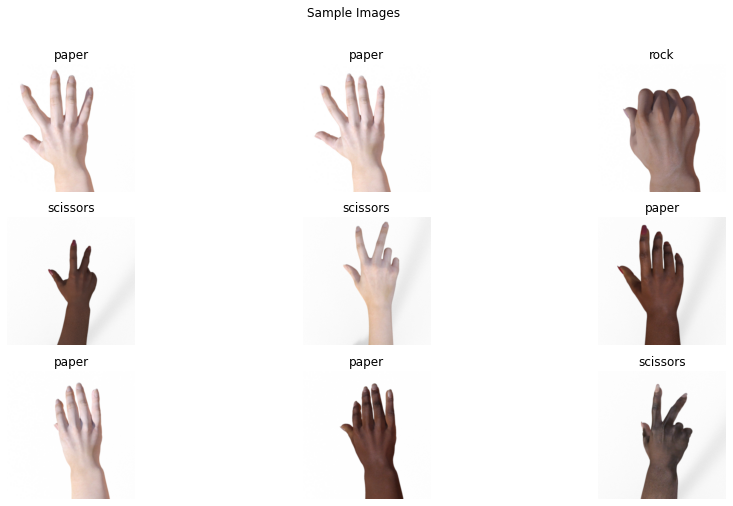

In [ ]:
# Generate a random sample of index
train_image_sample = np.random.randint(0,high=train_validate_x.shape[0]-1, size=9)

# Train images
fig = plt.figure(figsize=(15,8))
for i,img_idx in enumerate(train_image_sample):
    axs = fig.add_subplot(3,3,i+1)
    axs.set_title(index2label[train_validate_y[img_idx][0]])
    plt.imshow(train_validate_x[img_idx])
    plt.axis('off')

plt.suptitle("Sample Images")
plt.show()

In [ ]:
# Compute data size in memory
data = train_validate_x.reshape((train_validate_x.shape[0], train_validate_x.shape[1]*train_validate_x.shape[2]*train_validate_x.shape[3]))
print("Memory consumed by train_x:", data.nbytes / (1024 * 1024.0),"MB")

data = test_x.reshape((test_x.shape[0], test_x.shape[1]*test_x.shape[2]*test_x.shape[3]))
print("Memory consumed by test_x:", data.nbytes / (1024 * 1024.0),"MB")

Memory consumed by train_x: 648.8800048828125 MB
Memory consumed by test_x: 95.78704833984375 MB


In [ ]:
print("Total number of images:",train_validate_x.shape[0]+test_x.shape[0])
print("Total number of labels:",len(label_names))
uniqueValues, occurCount = np.unique(train_validate_y, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

# Mean, Stdev of an image
print("\nAcross All Channels:")
print("----------------------")
print("Minumum:",np.min(train_validate_x[:,:,:,:]))
print("Maximum:",np.max(train_validate_x[:,:,:,:]))
print("Mean:",np.mean(train_validate_x[:,:,:,:]))
print("Variance:",np.var(train_validate_x[:,:,:,:]))
print("Standard Deviation:",np.std(train_validate_x[:,:,:,:]))

Total number of images: 2892
Total number of labels: 3
Unique Values :  [0 1 2]
Occurrence Count :  [840 840 840]

Across All Channels:
----------------------
Minumum: 3
Maximum: 255
Mean: 211.06410729423868
Variance: 5134.565759783053
Standard Deviation: 71.65588433466614


#### Data Splits

It is important to fix the way we split data for our neural network models. Having a consistent way of doing this makes evaluation of models across the same dataset easier. A common strategy to split data for model training and evaluation is using the Train / Validation/ Test Split:
Train Set:
- The split of data used for training the model
Validation Set (also known as Dev Set):
- The split of data to validate the model while being trained
Test Set:
- A split of data that is never exposed to a model during the training process. This set is only used to do final evaluation of the model.

Example process for spliting data:  
- Split the entire dataset to keep 20% as the test set
- Split the remaining data to keep 20% as validation set
- The data that remains will be the training set  

In [ ]:
print("train_x shape:",train_validate_x.shape)
print("train_y shape:",train_validate_y.shape)

# Split data into train / validation
train_x, validate_x, train_y, validate_y = train_test_split(train_validate_x, train_validate_y, test_size=0.2) 

print("train_x shape:",train_x.shape)
print("train_y shape:",train_y.shape)
print("validate_x shape:",validate_x.shape)
print("validate_y shape:",validate_y.shape)

train_x shape: (2520, 300, 300, 3)
train_y shape: (2520, 1)
train_x shape: (2016, 300, 300, 3)
train_y shape: (2016, 1)
validate_x shape: (504, 300, 300, 3)
validate_y shape: (504, 1)


#### Data Pre Processing

**Normalization**

In images pixel values are integers with values between 0 and 255,
Normalization converts these value to range between 0 and 1

In [ ]:
sample_image = train_validate_x[0]

print("Minumum:",np.min(sample_image[:,:,:]))
print("Maximum:",np.max(sample_image[:,:,:]))

sample_image_processed = sample_image.astype("float")/255.0

print("After Normalization")
print("Minumum:",np.min(sample_image_processed[:,:,:]))
print("Maximum:",np.max(sample_image_processed[:,:,:]))

Minumum: 23
Maximum: 255
After Normalization
Minumum: 0.09019607843137255
Maximum: 1.0


**Center Pixel**

Image pixel values are integers with values between 0 and 255.
Centering is to subtract the mean value from the pixel values
so that the distribution of the pixel values is centered around zero

In [ ]:
sample_image = train_validate_x[0]

print("Minumum:",np.min(sample_image[:,:,0]))
print("Maximum:",np.max(sample_image[:,:,0]))
print("Mean:",np.mean(sample_image[:,:,0]))

mean = np.mean(train_x[:,:,:,0])
sample_image_processed = sample_image[:,:,0] - mean

print("After Normalization")
print("Minumum:",np.min(sample_image_processed[:,:]))
print("Maximum:",np.max(sample_image_processed[:,:]))
print("Mean:",np.mean(sample_image_processed[:,:]))

Minumum: 39
Maximum: 255
Mean: 221.5096111111111
After Normalization
Minumum: -177.59927524801589
Maximum: 38.400724751984114
Mean: 4.910335863095228


**One Hot Encoding**

In [ ]:
print("train_validate_y shape:",train_validate_y.shape)
print(train_y[:5])

#  Converts to binary class matrix (One-hot-encoded)
out = to_categorical(train_validate_y, num_classes=num_classes, dtype='float32')

print("out shape:",out.shape)
print(out[:5])

train_validate_y shape: (2520, 1)
[[1]
 [2]
 [1]
 [0]
 [1]]
out shape: (2520, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


#### Loading data using Numpy

In [ ]:
def build_model(image_height, image_width, num_channels, num_classes):

  # Model input
  input_shape = [image_height, image_width, num_channels] # height, width, channels

  # Create model
  model = Sequential()

  # Input
  model.add(layers.Input(shape=input_shape))
  # Hidden Layer
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(layers.Flatten())
  # Output Layer
  model.add(layers.Dense(units=num_classes, activation='softmax'))
  
  return model

In [ ]:
# Perform data pre processing
validation_percent = 0.2
image_width = 300
image_height = 300
num_channels = 3

# Split data into train / validation
train_x, validate_x, train_y, validate_y = train_test_split(train_validate_x, train_validate_y, test_size=validation_percent)

# In images pixel values are integers with values between 0 and 255,
# Normalization converts these value to range between 0 and 1
train_processed_x = train_x.astype("float")/255.0
validate_processed_x = validate_x.astype("float")/255.0
test_processed_x = test_x.astype("float")/255.0

#  Converts to binary class matrix (One-hot-encoded)
train_processed_y = to_categorical(train_y, num_classes=num_classes, dtype='float32')
validate_processed_y = to_categorical(validate_y, num_classes=num_classes, dtype='float32')
test_processed_y = to_categorical(test_y, num_classes=num_classes, dtype='float32')

print("Inputs x:")
print("train_processed_x shape:",train_processed_x.shape)
print("validate_processed_x shape:",validate_processed_x.shape)
print("test_processed_x shape:",test_processed_x.shape)
print("Outputs y:")
print("train_processed_y shape:",train_processed_y.shape)
print("validate_processed_y shape:",validate_processed_y.shape)
print("test_processed_y shape:",test_processed_y.shape)

print("Inputs:\n",train_processed_x[0][:5,:5,0])
print("Outputs:\n",train_processed_y[:5])

Inputs x:
train_processed_x shape: (2016, 300, 300, 3)
validate_processed_x shape: (504, 300, 300, 3)
test_processed_x shape: (372, 300, 300, 3)
Outputs y:
train_processed_y shape: (2016, 3)
validate_processed_y shape: (504, 3)
test_processed_y shape: (372, 3)
Inputs:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Outputs:
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
############################
# Training Params
############################
learning_rate = 0.01
batch_size = 32
epochs = 5
############################

# Free up memory
K.clear_session()

# Build the model
model = build_model(image_height, image_width, num_channels, num_classes)

# Optimizer
optimizer = optimizers.SGD(lr=learning_rate)

# Loss
loss = losses.categorical_crossentropy

# Compile
model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=['accuracy'])

# Train model
start_time = time.time()
training_results = model.fit(
        train_processed_x,
        train_processed_y,
        validation_data=(validate_processed_x,validate_processed_y),
        batch_size=batch_size, # Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32
        epochs=epochs, # Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 
        verbose=1)
execution_time = (time.time() - start_time)/60.0
print("Training execution time (mins)",execution_time)

Epoch 1/5
63/63 [==============================] - 2s 32ms/step - loss: 2.1786 - accuracy: 0.3715 - val_loss: 1.0492 - val_accuracy: 0.4960
Epoch 2/5
63/63 [==============================] - 2s 25ms/step - loss: 1.2150 - accuracy: 0.4365 - val_loss: 1.0985 - val_accuracy: 0.3254
Epoch 3/5
63/63 [==============================] - 2s 25ms/step - loss: 1.0025 - accuracy: 0.4921 - val_loss: 1.0265 - val_accuracy: 0.5179
Epoch 4/5
63/63 [==============================] - 2s 25ms/step - loss: 0.8724 - accuracy: 0.5794 - val_loss: 0.4658 - val_accuracy: 0.8651
Epoch 5/5
63/63 [==============================] - 2s 24ms/step - loss: 0.5610 - accuracy: 0.8130 - val_loss: 0.5401 - val_accuracy: 0.8393
Training execution time (mins) 0.24551038742065429


#### Loading data using ImageDataGenerator

In [ ]:
# Reload the dataset files
train_validate_x = []
train_validate_y = []
test_x = []
test_y = []

# Train/validate data
for label,file in train_list:
    # Train x
    train_validate_x.append(os.path.join(train_path,label,file))
    # Train y
    train_validate_y.append(label)

# Test data
for label,file in test_list:
    # Train x
    test_x.append(os.path.join(test_path,label,file))
    # Train y
    test_y.append(label)

# Convert to numpy array
train_validate_x = np.asarray(train_validate_x)
train_validate_y = np.asarray(train_validate_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)

print("train_validate_x shape:",train_validate_x.shape)
print("train_validate_y shape:",train_validate_y.shape)
print(train_validate_x[:5])
print(train_validate_y[:5])

print("test_x shape:",test_x.shape)
print("test_y shape:",test_y.shape)

train_validate_x shape: (2520,)
train_validate_y shape: (2520,)
['datasets/rps/scissors/scissors03-029.png'
 'datasets/rps/scissors/testscissors01-114.png'
 'datasets/rps/scissors/scissors01-055.png'
 'datasets/rps/scissors/testscissors02-013.png'
 'datasets/rps/scissors/scissors03-076.png']
['scissors' 'scissors' 'scissors' 'scissors' 'scissors']
test_x shape: (372,)
test_y shape: (372,)


In [ ]:
validation_percent = 0.2
image_width = 300
image_height = 300
num_channels = 3

train_batch_size = 32
validation_batch_size = 32
test_batch_size = 32

# Create dataframes
train_validate_df = pd.DataFrame(data=train_validate_x,columns=["x"])
train_validate_df["y"] = train_validate_y
print(train_validate_df.head())
test_df = pd.DataFrame(data=test_x,columns=["x"])
test_df["y"] = test_y
print(test_df.head())

# Generator for train and validation data
train_generator = ImageDataGenerator(
    rescale=1./255,        
    validation_split = validation_percent
)
# Generator for test data
test_generator = ImageDataGenerator(rescale=1./255)

# Train data
train_data = train_generator.flow_from_dataframe(
    dataframe=train_validate_df,
    x_col="x",
    y_col="y",
    subset="training",
    batch_size=train_batch_size,
    shuffle=True,
    class_mode="categorical",
    target_size=(image_width,image_height),
    color_mode="rgb"
)
train_data_count = train_data.samples
steps_per_epoch = np.int(train_data_count / train_batch_size)

# Validation data
validation_data = train_generator.flow_from_dataframe(
    dataframe=train_validate_df,
    x_col="x",
    y_col="y",
    subset="validation",
    batch_size=train_batch_size,
    shuffle=True,
    class_mode="categorical",
    target_size=(image_width,image_height),
    color_mode="rgb"
)
validation_data_count = validation_data.samples
validation_steps = np.int(validation_data_count / validation_batch_size)

# Test data
test_data = train_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col="x",
    y_col="y",
    batch_size=test_batch_size,
    class_mode="categorical",
    target_size=(image_width,image_height),
    color_mode="rgb"
)

                                              x         y
0      datasets/rps/scissors/scissors03-029.png  scissors
1  datasets/rps/scissors/testscissors01-114.png  scissors
2      datasets/rps/scissors/scissors01-055.png  scissors
3  datasets/rps/scissors/testscissors02-013.png  scissors
4      datasets/rps/scissors/scissors03-076.png  scissors
                                                  x         y
0  datasets/rps_test/scissors/testscissors04-11.png  scissors
1  datasets/rps_test/scissors/testscissors02-01.png  scissors
2  datasets/rps_test/scissors/testscissors02-12.png  scissors
3  datasets/rps_test/scissors/testscissors02-10.png  scissors
4  datasets/rps_test/scissors/testscissors01-26.png  scissors
Found 2016 validated image filenames belonging to 3 classes.
Found 504 validated image filenames belonging to 3 classes.
Found 372 validated image filenames belonging to 3 classes.


In [ ]:
############################
# Training Params
############################
learning_rate = 0.01
epochs = 5
############################

# Free up memory
K.clear_session()

# Build the model
model = build_model(image_height, image_width, num_channels, num_classes)

# Optimizer
optimizer = optimizers.SGD(lr=learning_rate)

# Loss
loss = losses.categorical_crossentropy

# Compile
model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=['accuracy'])

# Train model
start_time = time.time()
training_results = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=epochs, 
        verbose=1)
execution_time = (time.time() - start_time)/60.0
print("Training execution time (mins)",execution_time)

Epoch 1/5
63/63 [==============================] - 10s 162ms/step - loss: 1.0501 - accuracy: 0.4841 - val_loss: 2.1217 - val_accuracy: 0.0000e+00
Epoch 2/5
63/63 [==============================] - 10s 158ms/step - loss: 0.9151 - accuracy: 0.5749 - val_loss: 1.3674 - val_accuracy: 0.0000e+00
Epoch 3/5
63/63 [==============================] - 10s 159ms/step - loss: 0.7963 - accuracy: 0.6483 - val_loss: 0.8134 - val_accuracy: 0.4683
Epoch 4/5
63/63 [==============================] - 10s 159ms/step - loss: 0.7502 - accuracy: 0.7168 - val_loss: 1.1095 - val_accuracy: 0.2798
Epoch 5/5
63/63 [==============================] - 10s 159ms/step - loss: 0.6449 - accuracy: 0.7599 - val_loss: 1.3561 - val_accuracy: 0.0675
Training execution time (mins) 0.9333293358484904


#### **Loading data using tf.data**

This approach is the most recommened as `tf.data` API can be used to build simple but efficient data pipelines. The `tf.data` API enables you to build complex input pipelines from simple, reusable pieces. 

Input pipelines do not load all data to memory and streams data to the model as it is training. Pipelines can stream data from distributed file systems as well as local file systems. So in suumary  `tf.data` API will help you as a Data Science Practioner to work with large amounts of data, read from different data formats, and perform complex transformations.


[Reference](https://www.tensorflow.org/guide/data)

In [ ]:
validation_percent = 0.2
batch_size = 32
shuffle_buffer_size=1000

# Prepare the data
def load_image(path, label):
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image, channels=num_channels)
  image = tf.image.resize(image, [image_height,image_width])
  return image, label

# Normalize pixels
def normalize(image, label):
  image = image/255
  return image, label

# Split data into train / validation
train_x, validate_x, train_y, validate_y = train_test_split(train_validate_x, train_validate_y, test_size=validation_percent)

#  Converts to binary class matrix (One-hot-encoded)
train_processed_y = [label2index[label] for label in train_y]
validate_processed_y = [label2index[label] for label in validate_y]
test_processed_y = [label2index[label] for label in test_y]
train_processed_y = to_categorical(train_processed_y, num_classes=num_classes, dtype='float32')
validate_processed_y = to_categorical(validate_processed_y, num_classes=num_classes, dtype='float32')
test_processed_y = to_categorical(test_processed_y, num_classes=num_classes, dtype='float32')

# Create TF Dataset
train_data = tf.data.Dataset.from_tensor_slices((train_x.tolist(), train_processed_y))
validation_data = tf.data.Dataset.from_tensor_slices((validate_x.tolist(), validate_processed_y))
test_data = tf.data.Dataset.from_tensor_slices((test_x.tolist(), test_processed_y))

#############
# Train data
#############
# Apply all data processing logic
train_data = train_data.map(load_image, num_parallel_calls=AUTOTUNE)
train_data = train_data.map(normalize, num_parallel_calls=AUTOTUNE)
train_data = train_data.shuffle(buffer_size=shuffle_buffer_size)
train_data = train_data.batch(batch_size)

##################
# Validation data
##################
# Apply all data processing logic
validation_data = validation_data.map(load_image, num_parallel_calls=AUTOTUNE)
validation_data = validation_data.map(normalize, num_parallel_calls=AUTOTUNE)
validation_data = validation_data.shuffle(buffer_size=shuffle_buffer_size)
validation_data = validation_data.batch(batch_size)

############
# Test data
############
# Apply all data processing logic
test_data = test_data.map(load_image, num_parallel_calls=AUTOTUNE)
test_data = test_data.map(normalize, num_parallel_calls=AUTOTUNE)
test_data = test_data.batch(batch_size)

print("train_data",train_data)
print("validation_data",validation_data)
print("test_data",test_data)

train_data <BatchDataset shapes: ((None, 300, 300, 3), (None, 3)), types: (tf.float32, tf.float32)>
validation_data <BatchDataset shapes: ((None, 300, 300, 3), (None, 3)), types: (tf.float32, tf.float32)>
test_data <BatchDataset shapes: ((None, 300, 300, 3), (None, 3)), types: (tf.float32, tf.float32)>


In [ ]:
############################
# Training Params
############################
learning_rate = 0.01
epochs = 5

# Free up memory
K.clear_session()

# Build the model
model = build_model(image_height, image_width, num_channels, num_classes)

# Optimizer
optimizer = optimizers.SGD(lr=learning_rate)

# Loss
loss = losses.categorical_crossentropy

# Compile
model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=['accuracy'])

# Train model
start_time = time.time()
training_results = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=epochs, 
        verbose=1)
execution_time = (time.time() - start_time)/60.0
print("Training execution time (mins)",execution_time)

Epoch 1/5
63/63 [==============================] - 7s 110ms/step - loss: 1.1365 - accuracy: 0.4435 - val_loss: 1.0434 - val_accuracy: 0.5258
Epoch 2/5
63/63 [==============================] - 7s 108ms/step - loss: 0.9525 - accuracy: 0.5848 - val_loss: 0.8148 - val_accuracy: 0.7440
Epoch 3/5
63/63 [==============================] - 7s 108ms/step - loss: 0.7230 - accuracy: 0.7237 - val_loss: 1.1575 - val_accuracy: 0.5972
Epoch 4/5
63/63 [==============================] - 7s 107ms/step - loss: 0.4385 - accuracy: 0.8666 - val_loss: 0.2504 - val_accuracy: 0.9603
Epoch 5/5
63/63 [==============================] - 7s 108ms/step - loss: 0.2512 - accuracy: 0.9375 - val_loss: 0.1731 - val_accuracy: 0.9782
Training execution time (mins) 0.7527944842974345


## Util Methods for Model Training

In [ ]:
class JsonEncoder(json.JSONEncoder):
  def default(self, obj):
    if isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, decimal.Decimal):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return super(JsonEncoder, self).default(obj)

def save_model(path="models",model_name="model01"):

  # Ensure path exists
  if not os.path.exists(path):
      os.mkdir(path)

  # Save the enitire model (structure + weights)
  model.save(os.path.join(path,model_name+".hdf5"))

  # Save only the weights
  model.save_weights(os.path.join(path,model_name+".h5"))

  # Save the structure only
  model_json = model.to_json()
  with open(os.path.join(path,model_name+".json"), "w") as json_file:
      json_file.write(model_json)

def get_model_size(path="models",model_name="model01"):
  model_size = os.stat(os.path.join(path,model_name+".hdf5")).st_size
  return model_size

def evaluate_save_model(model,test_data, training_results,execution_time, learning_rate, batch_size, epochs, optimizer,save=True):
    
  # Get the model train history
  model_train_history = training_results.history
  # Get the number of epochs the training was run for
  num_epochs = len(model_train_history["loss"])

  # Plot training results
  fig = plt.figure(figsize=(15,5))
  axs = fig.add_subplot(1,2,1)
  axs.set_title('Loss')
  # Plot all metrics
  for metric in ["loss","val_loss"]:
      axs.plot(np.arange(0, num_epochs), model_train_history[metric], label=metric)
  axs.legend()
  
  axs = fig.add_subplot(1,2,2)
  axs.set_title('Accuracy')
  # Plot all metrics
  for metric in ["accuracy","val_accuracy"]:
      axs.plot(np.arange(0, num_epochs), model_train_history[metric], label=metric)
  axs.legend()

  plt.show()
  
  # Evaluate on test data
  evaluation_results = model.evaluate(test_data)
  print(evaluation_results)
  
  if save:
      # Save model
      save_model(model_name=model.name)
      model_size = get_model_size(model_name=model.name)

      # Save model history
      with open(os.path.join("models",model.name+"_train_history.json"), "w") as json_file:
          json_file.write(json.dumps(model_train_history,cls=JsonEncoder))

      trainable_parameters = model.count_params()

      # Save model metrics
      metrics ={
          "trainable_parameters":trainable_parameters,
          "execution_time":execution_time,
          "loss":evaluation_results[0],
          "accuracy":evaluation_results[1],
          "model_size":model_size,
          "learning_rate":learning_rate,
          "batch_size":batch_size,
          "epochs":epochs,
          "optimizer":type(optimizer).__name__
      }
      with open(os.path.join("models",model.name+"_model_metrics.json"), "w") as json_file:
          json_file.write(json.dumps(metrics,cls=JsonEncoder))

## Fully Connected Networks

#### Load Data

In [ ]:
# Load the dataset file detail only and not the actual files contents
train_validate_x = []
train_validate_y = []
test_x = []
test_y = []

# Train/validate data
for label,file in train_list:
    # Train x
    train_validate_x.append(os.path.join(train_path,label,file))
    # Train y
    train_validate_y.append(label)

# Test data
for label,file in test_list:
    # Train x
    test_x.append(os.path.join(test_path,label,file))
    # Train y
    test_y.append(label)

# Convert to numpy array
train_validate_x = np.asarray(train_validate_x)
train_validate_y = np.asarray(train_validate_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)

print("train_validate_x shape:",train_validate_x.shape)
print("train_validate_y shape:",train_validate_y.shape)
print(train_validate_x[:5])
print(train_validate_y[:5])

print("test_x shape:",test_x.shape)
print("test_y shape:",test_y.shape)

train_validate_x shape: (2520,)
train_validate_y shape: (2520,)
['datasets/rps/scissors/scissors03-029.png'
 'datasets/rps/scissors/testscissors01-114.png'
 'datasets/rps/scissors/scissors01-055.png'
 'datasets/rps/scissors/testscissors02-013.png'
 'datasets/rps/scissors/scissors03-076.png']
['scissors' 'scissors' 'scissors' 'scissors' 'scissors']
test_x shape: (372,)
test_y shape: (372,)


#### Data Preprocessing

In [ ]:
validation_percent = 0.2
batch_size = 32
shuffle_buffer_size=1000
image_width = 300
image_height = 300
num_channels = 3
flatten_shape = image_height * image_width * num_channels

# Prepare the data
def load_image(path, label):
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image, channels=num_channels)
  image = tf.image.resize(image, [image_height,image_width])
  return image, label

# Normalize pixels
def normalize(image, label):
  image = image/255
  return image, label

# Flatten Image
def flatten_image(image, label):
  image = tf.reshape(image, [flatten_shape])
  return image, label

# Split data into train / validation
train_x, validate_x, train_y, validate_y = train_test_split(train_validate_x, train_validate_y, test_size=validation_percent)

#  Converts to binary class matrix (One-hot-encoded)
train_processed_y = [label2index[label] for label in train_y]
validate_processed_y = [label2index[label] for label in validate_y]
test_processed_y = [label2index[label] for label in test_y]
train_processed_y = to_categorical(train_processed_y, num_classes=num_classes, dtype='float32')
validate_processed_y = to_categorical(validate_processed_y, num_classes=num_classes, dtype='float32')
test_processed_y = to_categorical(test_processed_y, num_classes=num_classes, dtype='float32')

# Create TF Dataset
train_data = tf.data.Dataset.from_tensor_slices((train_x.tolist(), train_processed_y))
validation_data = tf.data.Dataset.from_tensor_slices((validate_x.tolist(), validate_processed_y))
test_data = tf.data.Dataset.from_tensor_slices((test_x.tolist(), test_processed_y))

#############
# Train data
#############
# Apply all data processing logic
train_data = train_data.map(load_image, num_parallel_calls=AUTOTUNE)
train_data = train_data.map(normalize, num_parallel_calls=AUTOTUNE)
train_data = train_data.map(flatten_image, num_parallel_calls=AUTOTUNE)
train_data = train_data.shuffle(buffer_size=shuffle_buffer_size)
train_data = train_data.batch(batch_size)

##################
# Validation data
##################
# Apply all data processing logic
validation_data = validation_data.map(load_image, num_parallel_calls=AUTOTUNE)
validation_data = validation_data.map(normalize, num_parallel_calls=AUTOTUNE)
validation_data = validation_data.map(flatten_image, num_parallel_calls=AUTOTUNE)
validation_data = validation_data.shuffle(buffer_size=shuffle_buffer_size)
validation_data = validation_data.batch(batch_size)

############
# Test data
############
# Apply all data processing logic
test_data = test_data.map(load_image, num_parallel_calls=AUTOTUNE)
test_data = test_data.map(normalize, num_parallel_calls=AUTOTUNE)
test_data = test_data.map(flatten_image, num_parallel_calls=AUTOTUNE)
test_data = test_data.batch(batch_size)

print("train_data",train_data)
print("validation_data",validation_data)
print("test_data",test_data)

train_data <BatchDataset shapes: ((None, 270000), (None, 3)), types: (tf.float32, tf.float32)>
validation_data <BatchDataset shapes: ((None, 270000), (None, 3)), types: (tf.float32, tf.float32)>
test_data <BatchDataset shapes: ((None, 270000), (None, 3)), types: (tf.float32, tf.float32)>


#### Build Model

In [ ]:
# Build a simple Fully Connected model
def build_model(image_height, image_width, num_channels, num_classes):

  # Model input
  input_shape = [image_height*image_width*num_channels] # height, width, channels

  # Create model
  model = Sequential(name='model_'+str(int(time.time())))

  # Input
  model.add(layers.Input(shape=input_shape))
  # Hidden Layer
  model.add(layers.Dense(units=1024, activation="relu"))
  # Hidden Layer
  model.add(layers.Dense(units=512, activation="relu"))
  # Output Layer
  model.add(layers.Dense(units=num_classes, activation='softmax'))

  return model

#### Train Model

In [ ]:
############################
# Training Params
############################
learning_rate = 0.01
epochs = 15

# Free up memory
K.clear_session()

# Build the model
model = build_model(image_height, image_width, num_channels, num_classes)

# Print the model architecture
print(model.summary())

# Optimizer
optimizer = optimizers.SGD(lr=learning_rate)

# Loss
loss = losses.categorical_crossentropy

# Compile
model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=['accuracy'])

# Train model
start_time = time.time()
training_results = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=epochs, 
        verbose=1)
execution_time = (time.time() - start_time)/60.0
print("Training execution time (mins)",execution_time)

Model: "model_1600526094"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              276481024 
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 277,007,363
Trainable params: 277,007,363
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
63/63 [==============================] - 4s 58ms/step - loss: 65.4299 - accuracy: 0.3358 - val_loss: 1.1069 - val_accuracy: 0.3036
Epoch 2/15
63/63 [==============================] - 4s 57ms/step - loss: 1.0988 - accuracy: 0.3408 - val_loss: 1.1037 - val_accuracy: 0.3036
Epoch 3/15
63/63 [==============================] - 4s 59ms/step - loss: 1.098

#### Evaluate Model

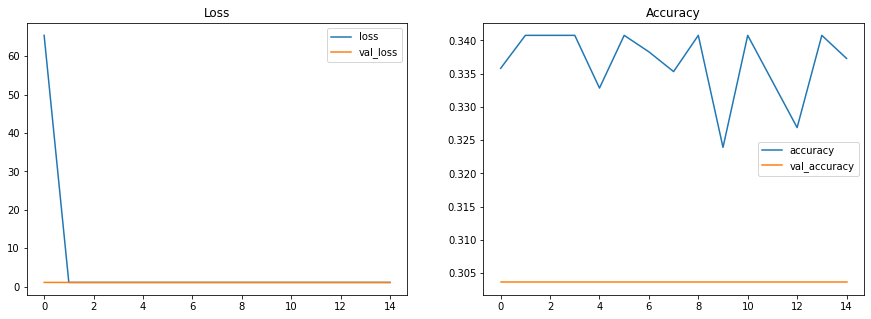

12/12 [==============================] - 0s 33ms/step - loss: 1.0992 - accuracy: 0.3333
[1.0991945266723633, 0.3333333432674408]


In [ ]:
evaluate_save_model(model,test_data, training_results,execution_time, learning_rate, batch_size, epochs, optimizer,save=True)

## Convolutional Neural Networks

#### Convolutions

[Convolutions Explained](https://medium.com/apache-mxnet/convolutions-explained-with-ms-excel-465d6649831c)  
[Convolutions Example](https://docs.google.com/spreadsheets/d/1fk_FTB7ZvOnp8CCcgyX4JbwDtXr96agdvyPDFzWaM1s/edit?usp=sharing)

![Convolutions](https://i.stack.imgur.com/Tnfmi.gif "Convolutions")  
[Reference](https://stackoverflow.com/questions/52067833/how-to-plot-an-animated-matrix-in-matplotlib)

In [ ]:
# Convolution code adapted from:
# https://www.kdnuggets.com/2018/04/building-convolutional-neural-network-numpy-scratch.html
def display_convolution_math(matrix1, matrix2):
    rows = matrix1.shape[0]
    cols = matrix1.shape[1]
    print(matrix1,"\nx\n",matrix2)
    out = ""
    for i in range(rows):
        for j in range(cols):
            if out != "":
                out = out + " + "
            out = out + str(matrix1[i][j]) + "*" + str(matrix2[i][j])
    
    print(out,"=",np.sum(np.multiply(matrix1,matrix2)))

def apply_convolution(image, kernel, debug=True):
    image_width = image.shape[1]
    image_height = image.shape[0]
    kernel_width = kernel.shape[1]
    kernel_height = kernel.shape[0]
    
    output_width = image_width-kernel_width + 1
    output_height = image_height-kernel_height + 1
    
    # Define an empty array
    output = np.zeros((output_height, output_width), dtype="float")
    
    for y in range(output_height):
        for x in range(output_width):
            image_chunk = image[y:y+kernel_height,x:x+kernel_width]
            output[y,x] = np.sum(np.multiply(image_chunk,kernel))
            if debug:
                display_convolution_math(image_chunk, kernel)
    
    return output

In [ ]:
image = np.array([
    [1,3,2],
    [1,3,3],
    [2,1,1]
])
kernel = np.array([
    [1,2],
    [0,1]
])

print("image:\n", image)
print("kernel:\n", kernel)
print("-------------------")
output = apply_convolution(image, kernel)
print("output\n",output)

image:
 [[1 3 2]
 [1 3 3]
 [2 1 1]]
kernel:
 [[1 2]
 [0 1]]
-------------------
[[1 3]
 [1 3]] 
x
 [[1 2]
 [0 1]]
1*1 + 3*2 + 1*0 + 3*1 = 10
[[3 2]
 [3 3]] 
x
 [[1 2]
 [0 1]]
3*1 + 2*2 + 3*0 + 3*1 = 10
[[1 3]
 [2 1]] 
x
 [[1 2]
 [0 1]]
1*1 + 3*2 + 2*0 + 1*1 = 8
[[3 3]
 [1 1]] 
x
 [[1 2]
 [0 1]]
3*1 + 3*2 + 1*0 + 1*1 = 10
output
 [[10. 10.]
 [ 8. 10.]]


#### Convolutions on an Image

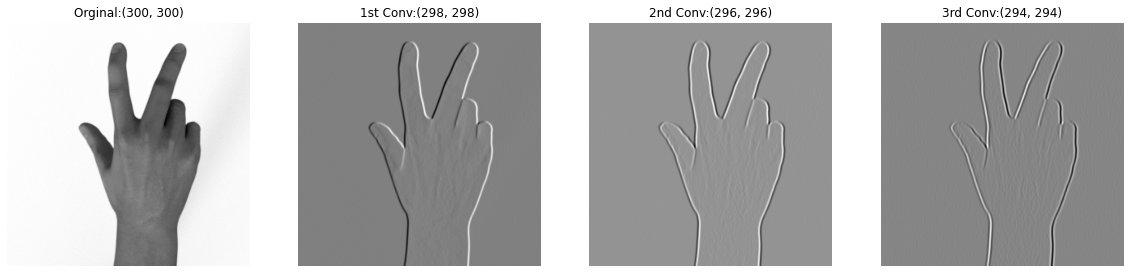

In [ ]:
# Read image
image = image = cv2.imread(train_validate_x[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(20,10))
axs = fig.add_subplot(1,4,1)
axs.set_title('Orginal:'+str(image.shape))
plt.imshow(image,cmap='gray')
plt.axis('off')

# Apply Convolution
kernel = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])
conv_output = apply_convolution(image, kernel, debug=False)

axs = fig.add_subplot(1,4,2)
axs.set_title('1st Conv:'+str(conv_output.shape))
plt.imshow(conv_output,cmap='gray')
plt.axis('off')

# Apply Convolution again
conv_output = apply_convolution(conv_output, kernel, debug=False)

axs = fig.add_subplot(1,4,3)
axs.set_title('2nd Conv:'+str(conv_output.shape))
plt.imshow(conv_output,cmap='gray')
plt.axis('off')

# Apply Convolution again
conv_output = apply_convolution(conv_output, kernel, debug=False)

axs = fig.add_subplot(1,4,4)
axs.set_title('3rd Conv:'+str(conv_output.shape))
plt.imshow(conv_output,cmap='gray')
plt.axis('off')

plt.show()

## Image Classification using CNN

In this section we will use CNN to perform image classification

Main steps we will follow are:
- Load Data
- Data Preprocessing
- Build model
- Select an Optimizer
- Select a loss function
- Train Model
- Evaluate Model
- Make Predictions

#### Load Data

In [ ]:
# Load the dataset file detail only and not the actual files contents
train_validate_x = []
train_validate_y = []
test_x = []
test_y = []

# Train/validate data
for label,file in train_list:
    # Train x
    train_validate_x.append(os.path.join(train_path,label,file))
    # Train y
    train_validate_y.append(label)

# Test data
for label,file in test_list:
    # Train x
    test_x.append(os.path.join(test_path,label,file))
    # Train y
    test_y.append(label)

# Convert to numpy array
train_validate_x = np.asarray(train_validate_x)
train_validate_y = np.asarray(train_validate_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)

print("train_validate_x shape:",train_validate_x.shape)
print("train_validate_y shape:",train_validate_y.shape)
print(train_validate_x[:5])
print(train_validate_y[:5])

print("test_x shape:",test_x.shape)
print("test_y shape:",test_y.shape)

train_validate_x shape: (2520,)
train_validate_y shape: (2520,)
['datasets/rps/scissors/scissors03-029.png'
 'datasets/rps/scissors/testscissors01-114.png'
 'datasets/rps/scissors/scissors01-055.png'
 'datasets/rps/scissors/testscissors02-013.png'
 'datasets/rps/scissors/scissors03-076.png']
['scissors' 'scissors' 'scissors' 'scissors' 'scissors']
test_x shape: (372,)
test_y shape: (372,)


#### Data Preprocessing

In [ ]:
validation_percent = 0.2
batch_size = 32
shuffle_buffer_size=1000
image_width = 300
image_height = 300
num_channels = 3

# Prepare the data
def load_image(path, label):
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image, channels=num_channels)
  image = tf.image.resize(image, [image_height,image_width])
  return image, label

# Normalize pixels
def normalize(image, label):
  image = image/255
  return image, label

# Split data into train / validation
train_x, validate_x, train_y, validate_y = train_test_split(train_validate_x, train_validate_y, test_size=validation_percent)

#  Converts to binary class matrix (One-hot-encoded)
train_processed_y = [label2index[label] for label in train_y]
validate_processed_y = [label2index[label] for label in validate_y]
test_processed_y = [label2index[label] for label in test_y]
train_processed_y = to_categorical(train_processed_y, num_classes=num_classes, dtype='float32')
validate_processed_y = to_categorical(validate_processed_y, num_classes=num_classes, dtype='float32')
test_processed_y = to_categorical(test_processed_y, num_classes=num_classes, dtype='float32')

# Create TF Dataset
train_data = tf.data.Dataset.from_tensor_slices((train_x.tolist(), train_processed_y))
validation_data = tf.data.Dataset.from_tensor_slices((validate_x.tolist(), validate_processed_y))
test_data = tf.data.Dataset.from_tensor_slices((test_x.tolist(), test_processed_y))

#############
# Train data
#############
# Apply all data processing logic
train_data = train_data.map(load_image, num_parallel_calls=AUTOTUNE)
train_data = train_data.map(normalize, num_parallel_calls=AUTOTUNE)
train_data = train_data.shuffle(buffer_size=shuffle_buffer_size)
train_data = train_data.batch(batch_size)

##################
# Validation data
##################
# Apply all data processing logic
validation_data = validation_data.map(load_image, num_parallel_calls=AUTOTUNE)
validation_data = validation_data.map(normalize, num_parallel_calls=AUTOTUNE)
validation_data = validation_data.shuffle(buffer_size=shuffle_buffer_size)
validation_data = validation_data.batch(batch_size)

############
# Test data
############
# Apply all data processing logic
test_data = test_data.map(load_image, num_parallel_calls=AUTOTUNE)
test_data = test_data.map(normalize, num_parallel_calls=AUTOTUNE)
test_data = test_data.batch(batch_size)

print("train_data",train_data)
print("validation_data",validation_data)
print("test_data",test_data)

train_data <BatchDataset shapes: ((None, 300, 300, 3), (None, 3)), types: (tf.float32, tf.float32)>
validation_data <BatchDataset shapes: ((None, 300, 300, 3), (None, 3)), types: (tf.float32, tf.float32)>
test_data <BatchDataset shapes: ((None, 300, 300, 3), (None, 3)), types: (tf.float32, tf.float32)>


#### Build Model

In [ ]:
# Build a simple CNN model
def build_model(image_height, image_width, num_channels, num_classes):
  # Model input
  input_shape = [image_height, image_width, num_channels] # height, width, channels
  model_input = layers.Input(shape=input_shape)

  # Hidden Layer, Convolution Block
  hidden = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(model_input)

  # Flatten
  hidden = layers.Flatten()(hidden)
  # Output Layer
  output = layers.Dense(units=num_classes, activation='softmax')(hidden)

  # Create model
  model = Model(model_input, output, name='model_'+str(int(time.time())))

  return model

#### Train Model

In [ ]:
############################
# Training Params
############################
learning_rate = 0.01
epochs = 15

# Free up memory
K.clear_session()

# Build the model
model = build_model(image_height, image_width, num_channels, num_classes)

# Print the model architecture
print(model.summary())

# Optimizer
optimizer = optimizers.SGD(lr=learning_rate)

# Loss
loss = losses.categorical_crossentropy

# Compile
model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=['accuracy'])

# Train model
start_time = time.time()
training_results = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=epochs, 
        verbose=1)
execution_time = (time.time() - start_time)/60.0
print("Training execution time (mins)",execution_time)

Model: "model_1600518501"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 2880000)           0         
_________________________________________________________________
dense (Dense)                (None, 3)                 8640003   
Total params: 8,640,899
Trainable params: 8,640,899
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
63/63 [==============================] - 4s 64ms/step - loss: 2.2318 - accuracy: 0.4038 - val_loss: 1.0411 - val_accuracy: 0.5655
Epoch 2/15
63/63 [==============================] - 4s 63ms/step - loss: 0.9030 - accuracy: 

#### Evaluate Model

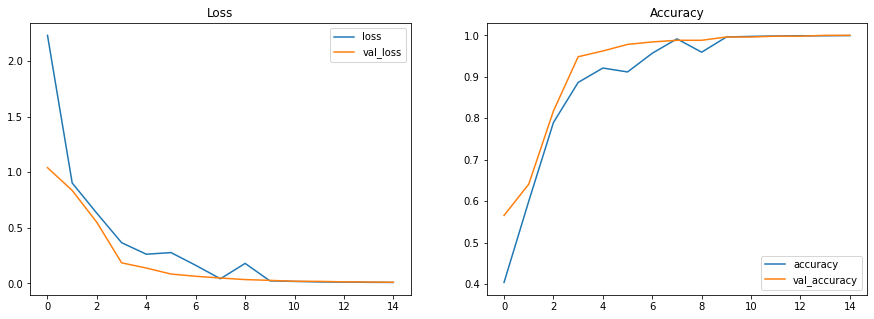

12/12 [==============================] - 0s 35ms/step - loss: 2.8636 - accuracy: 0.6022
[2.863563060760498, 0.602150559425354]


In [ ]:
evaluate_save_model(model,test_data, training_results,execution_time, learning_rate, batch_size, epochs, optimizer,save=True)

#### Build Model with Maxpooling

In [ ]:
# Build a simple CNN model
def build_model(image_height, image_width, num_channels, num_classes):
  # Model input
  input_shape = [image_height, image_width, num_channels] # height, width, channels
  model_input = layers.Input(shape=input_shape)

  # Hidden Layer, Convolution Block
  hidden = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(model_input)

  ########### Pooling Layer ##########
  hidden = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(hidden)
  ####################################

  # Flatten
  hidden = layers.Flatten()(hidden)
  # Output Layer
  output = layers.Dense(units=num_classes, activation='softmax')(hidden)

  # Create model
  model = Model(model_input, output, name='model_'+str(int(time.time())))

  return model

Model: "model_1600520248"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 2160003   
Total params: 2,160,899
Trainable params: 2,160,899
Non-trainable params: 0
_________________________________________________________________
None
Training execution time (mins) 1.14996839761734


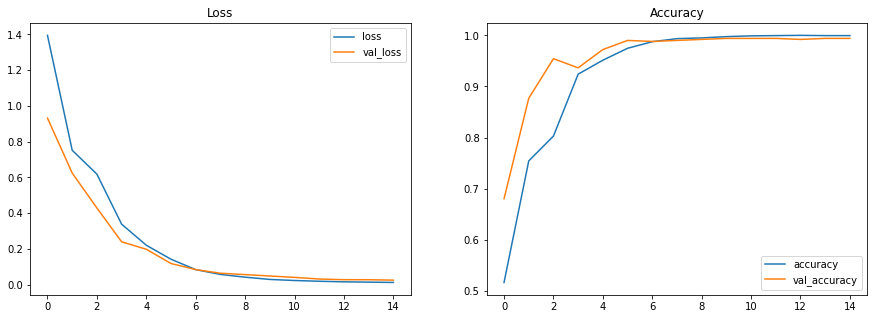

12/12 [==============================] - 0s 34ms/step - loss: 1.0228 - accuracy: 0.7043
[1.0227981805801392, 0.7043010592460632]


In [ ]:
############################
# Training Params
############################
learning_rate = 0.01
epochs = 15

# Free up memory
K.clear_session()

# Build the model
model = build_model(image_height, image_width, num_channels, num_classes)

# Print the model architecture
print(model.summary())

# Optimizer
optimizer = optimizers.SGD(lr=learning_rate)

# Loss
loss = losses.categorical_crossentropy

# Compile
model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=['accuracy'])

# Train model
start_time = time.time()
training_results = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=epochs, 
        verbose=0)
execution_time = (time.time() - start_time)/60.0
print("Training execution time (mins)",execution_time)

evaluate_save_model(model,test_data, training_results,execution_time, learning_rate, batch_size, epochs, optimizer,save=True)

#### Build Model with Additional Dense Layer

In [ ]:
# Build a simple CNN model
def build_model(image_height, image_width, num_channels, num_classes):
  # Model input
  input_shape = [image_height, image_width, num_channels] # height, width, channels
  model_input = layers.Input(shape=input_shape)

  # Hidden Layer, Convolution Block
  hidden = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(model_input)
  hidden = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(hidden)

  # Flatten
  hidden = layers.Flatten()(hidden)

  ########### Additional Dense Layer  ##########
  hidden = layers.Dense(units=256, activation='relu')(hidden)
  ##############################################

  # Output Layer
  output = layers.Dense(units=num_classes, activation='softmax')(hidden)

  # Create model
  model = Model(model_input, output, name='model_'+str(int(time.time())))

  return model

Model: "model_1600520428"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               184320256 
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 184,321,923
Trainable params: 184,321,923
Non-trainable params: 0
____________________________________

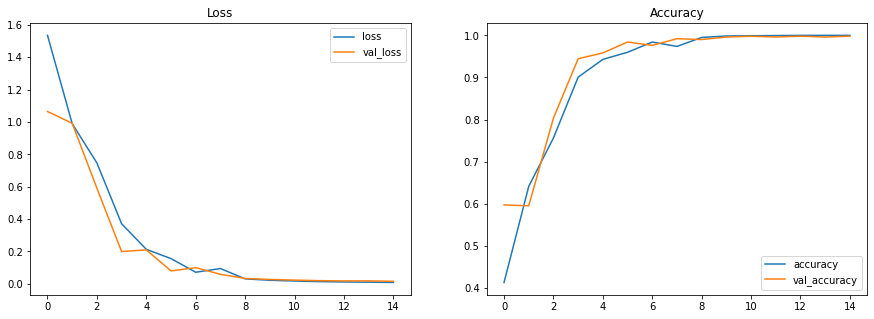

12/12 [==============================] - 0s 35ms/step - loss: 1.5643 - accuracy: 0.6855
[1.5642672777175903, 0.6854838728904724]


In [ ]:
############################
# Training Params
############################
learning_rate = 0.01
epochs = 15

# Free up memory
K.clear_session()

# Build the model
model = build_model(image_height, image_width, num_channels, num_classes)

# Print the model architecture
print(model.summary())

# Optimizer
optimizer = optimizers.SGD(lr=learning_rate)

# Loss
loss = losses.categorical_crossentropy

# Compile
model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=['accuracy'])

# Train model
start_time = time.time()
training_results = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=epochs, 
        verbose=0)
execution_time = (time.time() - start_time)/60.0
print("Training execution time (mins)",execution_time)

evaluate_save_model(model,test_data, training_results,execution_time, learning_rate, batch_size, epochs, optimizer,save=True)

#### Build model with multiple conv blocks

In [ ]:
# Build a simple CNN model
def build_model(image_height, image_width, num_channels, num_classes):
  # Model input
  input_shape = [image_height, image_width, num_channels] # height, width, channels
  model_input = layers.Input(shape=input_shape)

  # Hidden Layer, Convolution Block
  hidden = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(model_input)
  hidden = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(hidden)

  # Hidden Layer, Convolution Block
  hidden = layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu')(hidden)
  hidden = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(hidden)

  # Flatten
  hidden = layers.Flatten()(hidden)
  hidden = layers.Dense(units=256, activation='relu')(hidden)

  # Output Layer
  output = layers.Dense(units=num_classes, activation='softmax')(hidden)

  # Create model
  model = Model(model_input, output, name='model_'+str(int(time.time())))

  return model

Model: "model_1600520599"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 16)      4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 90000)             0         
_________________________________________________________________
dense (Dense)                (None, 256)          

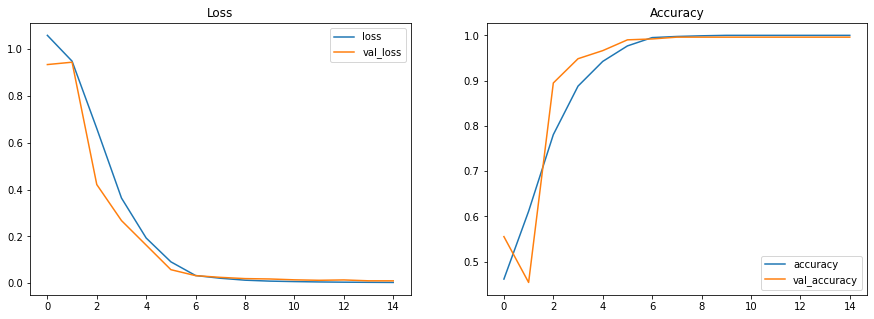

12/12 [==============================] - 0s 38ms/step - loss: 1.0666 - accuracy: 0.7473
[1.0666452646255493, 0.7473118305206299]


In [ ]:
############################
# Training Params
############################
learning_rate = 0.01
epochs = 15

# Free up memory
K.clear_session()

# Build the model
model = build_model(image_height, image_width, num_channels, num_classes)

# Print the model architecture
print(model.summary())

# Optimizer
optimizer = optimizers.SGD(lr=learning_rate)

# Loss
loss = losses.categorical_crossentropy

# Compile
model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=['accuracy'])

# Train model
start_time = time.time()
training_results = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=epochs, 
        verbose=0)
execution_time = (time.time() - start_time)/60.0
print("Training execution time (mins)",execution_time)

evaluate_save_model(model,test_data, training_results,execution_time, learning_rate, batch_size, epochs, optimizer,save=True)

## Comparing Performance of all Models

In [ ]:
models_store_path = "models"

models_metrics_list = glob(models_store_path+"/*_model_metrics.json")

all_models_metrics = []
for mm_file in models_metrics_list:
  with open(mm_file) as json_file:
    model_metrics = json.load(json_file)
    model_metrics["name"] = mm_file.replace("models/","").replace("_model_metrics.json","")
    all_models_metrics.append(model_metrics)

# Load metrics to dataframe
view_metrics = pd.DataFrame(data=all_models_metrics)

# Format columns
view_metrics['accuracy'] = view_metrics['accuracy']*100
view_metrics['accuracy'] = view_metrics['accuracy'].map('{:,.2f}%'.format)

view_metrics['trainable_parameters'] = view_metrics['trainable_parameters'].map('{:,.0f}'.format)
view_metrics['execution_time'] = view_metrics['execution_time'].map('{:,.2f} mins'.format)
view_metrics['loss'] = view_metrics['loss'].map('{:,.2f}'.format)
view_metrics['model_size'] = view_metrics['model_size']/1000000
view_metrics['model_size'] = view_metrics['model_size'].map('{:,.0f} MB'.format)

view_metrics = view_metrics.sort_values(by=['loss'])
view_metrics.head(10)

,trainable_parameters,execution_time,loss,accuracy,model_size,learning_rate,batch_size,epochs,optimizer,name
4,"2,160,899",1.15 mins,1.02,70.43%,9 MB,0.01,32,15,SGD,model_1600520248
2,"23,046,547",1.16 mins,1.07,74.73%,92 MB,0.01,32,15,SGD,model_1600520599
3,"277,007,363",1.21 mins,1.10,33.33%,"1,108 MB",0.01,32,15,SGD,model_1600526094
1,"184,321,923",1.17 mins,1.56,68.55%,737 MB,0.01,32,15,SGD,model_1600520428
0,"8,640,899",1.31 mins,2.86,60.22%,35 MB,0.01,32,15,SGD,model_1600518501


## Loading Saved Models

In [ ]:
# Load a model from disk
prediction_model = keras.models.load_model('models/'+view_metrics.iloc[0]["name"]+'.hdf5')

prediction_model.summary()

Model: "model_1600520248"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 2160003   
Total params: 2,160,899
Trainable params: 2,160,899
Non-trainable params: 0
_________________________________________________________________


## Regularization Methods

As we saw earlier the more layers added to the model, the model becomes more complex and also saw an increase in test accuracy. But how far can we take this. At a certain point the model will stop to generalize and start overfitting. Regularization is a method used to reduce model complexity and reduce overfitting. 

“Many strategies used in machine learning are explicitly designed to reduce the test error, possibly at the expense of increased training error. These strategies are collectively known as regularization.” – Goodfellow et al.

Let us look at a simple example to see how regularization helps when you are trying to fit a model to your data.

In Deep Learning there are different approaches to apply regularization to a model

## Advanced Optimization Methods

## Data Augmentation

## AutoEncoder

Variational autoencoders are the autoencoders used in practice. They aim to encode an input to a low-dimensional latent space and then decode it back that mixes ideas from deep learning with Bayesian inference. 

A classical image autoencoder takes an image, maps it to a latent vector space via an encoder module, and then decodes it back to an output with the same dimensions as the original image, via a decoder module.

A VAE, instead of compressing its input image into a fixed code in the latent space, turns the image into the parameters of a statistical distribution: a mean and a vari- ance. Essentially, this means you’re assuming the input image has been generated by a statistical process, and that the randomness of this process should be taken into account during encoding and decoding. The VAE then uses the mean and variance parameters to randomly sample one element of the distribution, and decodes that ele- ment back to the original input.


[Reference](https://www.manning.com/books/deep-learning-with-python)

#### Conv2D Layer

In [ ]:
# Reference
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

# The inputs are 28x28 RGB images 3 channels
input_shape = (1, 28, 28, 3)
input_data = tf.random.normal(input_shape)
output = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(input_data)

print("Input Shape:", input_data.shape)
print("Output Shape:", output.shape)

Input Shape: (1, 28, 28, 3)
Output Shape: (1, 26, 26, 64)


#### Conv2DTranspose Layer

In [ ]:
# Reference
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose
# Transposed convolution layer (sometimes called Deconvolution).

input_data = tf.Variable(tf.constant([[1,1,1], [2,2,2], [3,3,3]],dtype=tf.float32))
input_data = tf.reshape(input_data, [1, 3, 3, 1])
print("Input Shape:", input_data.shape)
ip = input_data.numpy()
for r in ip[0]:
    print(r[0][0],r[1][0],r[2][0])

convtranspose = layers.Conv2DTranspose(filters=3, kernel_size=3, strides=2, padding="same")(input_data)
output = convtranspose.numpy()
print("Output Shape:", output.shape)
for r in output[0]:
    print(r)

Input Shape: (1, 3, 3, 1)
1.0 1.0 1.0
2.0 2.0 2.0
3.0 3.0 3.0
Output Shape: (1, 6, 6, 3)
[[-0.28640437  0.3437236   0.20789576]
 [ 0.36175     0.19494748  0.33307618]
 [-0.46594974  0.7247378   0.53777736]
 [ 0.36175     0.19494748  0.33307618]
 [-0.46594974  0.7247378   0.53777736]
 [ 0.36175     0.19494748  0.33307618]]
[[-0.14445493 -0.11666316  0.24560887]
 [-0.27422303 -0.2149185   0.3530181 ]
 [-0.03466144 -0.28899297 -0.1583288 ]
 [-0.27422303 -0.2149185   0.3530181 ]
 [-0.03466144 -0.28899297 -0.1583288 ]
 [-0.27422303 -0.2149185   0.3530181 ]]
[[-0.89023066  0.32318062  0.52549565]
 [ 0.69589543  0.06984544  0.6417624 ]
 [-1.3726158   1.3298117   1.1644905 ]
 [ 0.69589543  0.06984544  0.6417624 ]
 [-1.3726158   1.3298116   1.1644905 ]
 [ 0.69589543  0.06984544  0.6417624 ]]
[[-0.28890985 -0.23332632  0.49121773]
 [-0.54844606 -0.429837    0.7060362 ]
 [-0.06932288 -0.57798594 -0.3166576 ]
 [-0.54844606 -0.429837    0.7060362 ]
 [-0.06932288 -0.57798594 -0.3166576 ]
 [-0.548446

#### Custom Sampling Layer

In [ ]:
# Reference:
# https://keras.io/examples/generative/vae/

class Sampling(layers.Layer):
  """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

  def call(self, inputs):
      z_mean, z_log_var = inputs
      batch = tf.shape(z_mean)[0]
      dim = tf.shape(z_mean)[1]
      epsilon = keras.backend.random_normal(shape=(batch, dim))
      return z_mean + tf.exp(0.5 * z_log_var) * epsilon

#### Build Encoder

In [ ]:
latent_dim = 2

# Model input
input_shape = [28, 28, 1] # height, width, channels
encoder_input = layers.Input(shape=input_shape)

# Hidden Layer, Convolution Block
hidden = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(encoder_input)
hidden = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(hidden)

encoder_shape_before_flatten = K.int_shape(hidden)
print("encoder_shape_before_flatten:", encoder_shape_before_flatten)

# Flatten
hidden = layers.Flatten()(hidden)
hidden = layers.Dense(units=16, activation='relu')(hidden)

# Output Layers
z_mean = layers.Dense(latent_dim, name="z_mean")(hidden)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(hidden)
z = Sampling()([z_mean, z_log_var])

# Create encoder
encoder = Model(encoder_input, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

encoder_shape_before_flatten: (None, 7, 7, 64)
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 7, 7, 64)     18496       conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 3136)         0           conv2d_1[0][0]                   
_____________________________________________

#### Build Decoder

In [ ]:
# Model input
latent_inputs = keras.Input(shape=(latent_dim,))

flatten_size = encoder_shape_before_flatten[1] * encoder_shape_before_flatten[2] * encoder_shape_before_flatten[3]
print("flatten_size:",flatten_size)

# Hidden Layer
hidden = layers.Dense(flatten_size, activation="relu")(latent_inputs)
hidden = layers.Reshape((encoder_shape_before_flatten[1], encoder_shape_before_flatten[2], encoder_shape_before_flatten[3]))(hidden)

# Up Sampling
hidden = layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), activation="relu", strides=(2, 2), padding="same")(hidden)
hidden = layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), activation="relu", strides=(2, 2), padding="same")(hidden)

# Output Layers
decoder_outputs = layers.Conv2DTranspose(filters=1, kernel_size=(3, 3), activation="sigmoid", padding="same")(hidden)

# Create decoder
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

flatten_size: 3136
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
____________________________________

#### Build VAE Model

In [ ]:
# Reference:
# https://keras.io/examples/generative/vae/

class VAE(keras.Model):
  def __init__(self, encoder, decoder, **kwargs):
      super(VAE, self).__init__(**kwargs)
      self.encoder = encoder
      self.decoder = decoder

  def train_step(self, data):
      if isinstance(data, tuple):
          data = data[0]
      with tf.GradientTape() as tape:
          z_mean, z_log_var, z = encoder(data)
          reconstruction = decoder(z)
          reconstruction_loss = tf.reduce_mean(
              keras.losses.binary_crossentropy(data, reconstruction)
          )
          reconstruction_loss *= 28 * 28
          kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
          kl_loss = tf.reduce_mean(kl_loss)
          kl_loss *= -0.5
          total_loss = reconstruction_loss + kl_loss
      grads = tape.gradient(total_loss, self.trainable_weights)
      self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
      return {
          "loss": total_loss,
          "reconstruction_loss": reconstruction_loss,
          "kl_loss": kl_loss,
      }

#### Train VAE

In [ ]:
############################
# Training Params
############################
learning_rate = 0.01
epochs = 30

# Free up memory
K.clear_session()

# Load data
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

# Build the model
model = VAE(encoder, decoder)

# Optimizer
optimizer = optimizers.Adam(lr=learning_rate)

# Compile
model.compile(optimizer=optimizer)

# Train model
start_time = time.time()
training_results = model.fit(
        mnist_digits,
        epochs=epochs, 
        verbose=1)
execution_time = (time.time() - start_time)/60.0
print("Training execution time (mins)",execution_time)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/30
2188/2188 [==============================] - 8s 4ms/step - loss: 165.2424 - reconstruction_loss: 162.2941 - kl_loss: 2.9483
Epoch 2/30
2188/2188 [==============================] - 8s 4ms/step - loss: 156.1834 - reconstruction_loss: 152.8594 - kl_loss: 3.3240
Epoch 3/30
2188/2188 [==============================] - 9s 4ms/step - loss: 154.2820 - reconstruction_loss: 150.9443 - kl_loss: 3.3377
Epoch 4/30
2188/2188 [==============================] - 8s 4ms/step - loss: 152.8432 - reconstruction_loss: 149.4582 - kl_loss: 3.3850
Epoch 5/30
2188/2188 [==============================] - 9s 4ms/step - loss: 152.1609 - reconstruction_loss: 148.7347 - kl_loss: 3.4262
Epoch 6/30
2188/2188 [==============================] - 8s 4ms/step - loss: 151.9439 - reconstruction_loss: 148.4865 - kl_loss: 3.4575
Epoch 7/30
2188/2188 [==============================] - 8s 4ms/step - loss: 151.6303 - reconstruction_loss: 148.1439 - kl_los

#### Plot Latent Space Clusters

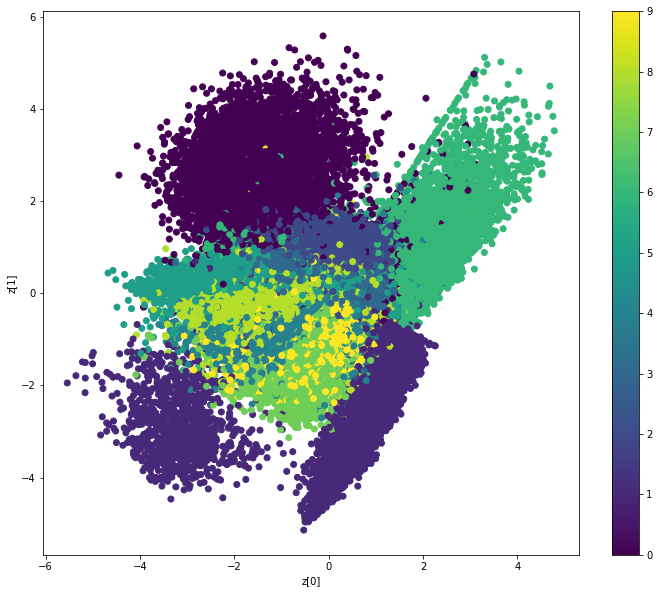

In [ ]:
# Reference:
# https://keras.io/examples/generative/vae/

def plot_label_clusters(encoder, decoder, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(encoder, decoder, x_train, y_train)